## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Test Technique Machine Learning-IA</span></b> </div>

**Le but de l'attrition des employés est le départ des employés de leur organisation pour des raisons imprévisibles ou incontrôlables. De nombreux termes composent l'attrition, les plus courants étant le licenciement, la démission, la retraite planifiée ou volontaire, les changements structurels, les maladies de longue durée, les licenciements.**

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Introduction </span></b> </div>

*L'attrition des employés se produit lorsqu'un employé quitte une organisation pour une raison quelconque et n'est pas remplacé pendant une longue période, voire jamais. Cela entraîne souvent une diminution de la taille des effectifs d'une organisation ou d'un service, car les postes ne sont pas pourvus lorsque les employés partent.*

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Importation des Libreries</span></b> </div>

# Etape 1:
**Preparation et exploration des donnees**

In [138]:
# Bibliothèque pour la manipulation de données.
import pandas as pd
import numpy as np

#Bibliothèque pour la visualisation de données.
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Bibliothèque pour surmonter les avertissements.
import warnings
warnings.filterwarnings('ignore')

# Bibliothèque pour effectuer une analyse statistique.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Chargement du Jeu de Donnees</span></b> </div>

In [139]:
df = pd.read_csv('./HR-Employee-Attrition.csv')

# Exploration Des Donnees

Pour etre aiser dans la manipulation de nos differents donnes nous avons fait le choix de transformer toutes les colonnes en Francais

In [140]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [141]:
mapping = {
    'Age': 'Âge',
    'Attrition': 'Attrition',
    'BusinessTravel': 'VoyageAffaires',
    'DailyRate': 'TauxJournalier',
    'Department': 'Département',
    'DistanceFromHome': 'DistanceDomicileTravail',
    'Education': 'Education',
    'EducationField': 'DomaineEducation',
    'EmployeeCount': 'NombreEmployes',
    'EmployeeNumber': 'NumeroEemploye',
    'EnvironmentSatisfaction': 'SatisfactionEnvironnementale',
    'Gender': 'Genre',
    'HourlyRate': 'TauxHoraire',
    'JobInvolvement': 'ImplicationAuTravail',
    'JobLevel': 'NiveauEmploi',
    'JobRole': 'ROleprofessionnel',
    'JobSatisfaction': 'SatisfactionaUtravail',
    'MaritalStatus': 'EtatCivil',
    'MonthlyIncome': 'RevenuMensuel',
    'MonthlyRate': 'TauxMensuel',
    'NumCompaniesWorked': 'NombreEntreprisesTravaillEes',
    'Over18': 'PlusDe18ans',
    'OverTime': 'HeuresSupplEmentaires',
    'PercentSalaryHike': 'AugmentationDesalaireEnpourcentage',
    'PerformanceRating': 'EvaluationDesPerformances',
    'RelationshipSatisfaction': 'SatisfactionRelationnelle',
    'StandardHours': 'HeuresStandard',
    'StockOptionLevel': 'NiveauOptionAchatActions',
    'TotalWorkingYears': 'TotalDesannEesDeTravail',
    'TrainingTimesLastYear': 'NombreDeFormationSuiviesAnnEeDernière',
    'WorkLifeBalance': 'EquilibreTravailViePersonnelle',
    'YearsAtCompany': 'AnneesDansEntreprise',
    'YearsInCurrentRole': 'AnneesDansPosteActuel',
    'YearsSinceLastPromotion': 'AnnEesDepuis la dernierePromotion',
    'YearsWithCurrManager': 'AnneesAvecManagerActuel'
}

In [142]:
df.rename(columns=mapping, inplace=True)

### .Affichage des premieres lignes du DataFrame

In [143]:
df.head()

,Âge,Attrition,VoyageAffaires,TauxJournalier,Département,DistanceDomicileTravail,Education,DomaineEducation,NombreEmployes,NumeroEemploye,...,SatisfactionRelationnelle,HeuresStandard,NiveauOptionAchatActions,TotalDesannEesDeTravail,NombreDeFormationSuiviesAnnEeDernière,EquilibreTravailViePersonnelle,AnneesDansEntreprise,AnneesDansPosteActuel,AnnEesDepuis la dernierePromotion,AnneesAvecManagerActuel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Âge                                    1470 non-null   int64 
 1   Attrition                              1470 non-null   object
 2   VoyageAffaires                         1470 non-null   object
 3   TauxJournalier                         1470 non-null   int64 
 4   Département                            1470 non-null   object
 5   DistanceDomicileTravail                1470 non-null   int64 
 6   Education                              1470 non-null   int64 
 7   DomaineEducation                       1470 non-null   object
 8   NombreEmployes                         1470 non-null   int64 
 9   NumeroEemploye                         1470 non-null   int64 
 10  SatisfactionEnvironnementale           1470 non-null   int64 
 11  Genre            

### Le jeu de données comprend 1470 entrées avec 35 colonnes, dont 26 sont de type entier (int64) et 9 de type objet (object). Il contient des informations variées sur les employés, telles que l'âge, l'attrition, le département, le salaire mensuel, et d'autres facteurs liés à leur emploi et à leur satisfaction.

### Statistiques descriptive du DataFrame

In [145]:
df.describe()

,Âge,TauxJournalier,DistanceDomicileTravail,Education,NombreEmployes,NumeroEemploye,SatisfactionEnvironnementale,TauxHoraire,ImplicationAuTravail,NiveauEmploi,...,SatisfactionRelationnelle,HeuresStandard,NiveauOptionAchatActions,TotalDesannEesDeTravail,NombreDeFormationSuiviesAnnEeDernière,EquilibreTravailViePersonnelle,AnneesDansEntreprise,AnneesDansPosteActuel,AnnEesDepuis la dernierePromotion,AnneesAvecManagerActuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Verification des Valeurs Manquantes

In [146]:
df.isnull().sum()

Âge                                      0
Attrition                                0
VoyageAffaires                           0
TauxJournalier                           0
Département                              0
DistanceDomicileTravail                  0
Education                                0
DomaineEducation                         0
NombreEmployes                           0
NumeroEemploye                           0
SatisfactionEnvironnementale             0
Genre                                    0
TauxHoraire                              0
ImplicationAuTravail                     0
NiveauEmploi                             0
ROleprofessionnel                        0
SatisfactionaUtravail                    0
EtatCivil                                0
RevenuMensuel                            0
TauxMensuel                              0
NombreEntreprisesTravaillEes             0
PlusDe18ans                              0
HeuresSupplEmentaires                    0
Augmentatio

Au vu de se resultat on constate qu'il ne posse pas de ligne qui comporte les valeurs nulles

### verification des enregistrement en doubles

In [147]:
df.duplicated().sum()

0

# Etape 2:
Anlyse Exploratoir Des Donnees

In [148]:
# Visualisation de la distribution de la variable cible
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Le nombre d'employés ayant quitté l'entreprise (Yes) est de 237, tandis que 1233 employés sont restés (No), ce qui représente une attrition de 16.1% dans l'échantillon étudié.

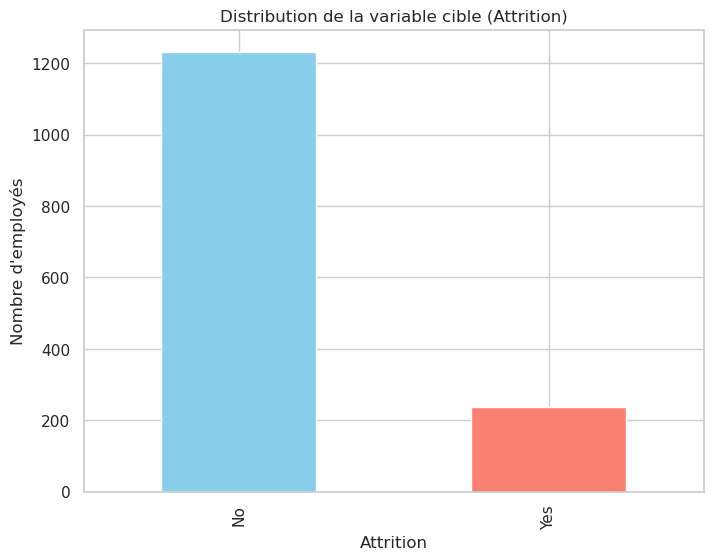

In [149]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque classe dans la variable cible
target_counts = df['Attrition'].value_counts()

# Créer un histogramme avec matplotlib
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution de la variable cible (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.show()


En résumé, sur un total de 1470 employés étudiés, 237 ont quitté l'entreprise (16.1%), tandis que 1233 sont restés. Cela montre un taux d'attrition significatif à prendre en compte pour les stratégies de gestion des ressources humaines et de rétention du personnel.

In [150]:
import numpy as np

# Identifier les types de données des colonnes
types_donnees_colonnes = df.dtypes

# Compter les colonnes numériques et catégorielles
compteur_numerique = 0
compteur_categoriel = 0

for nom_colonne, type_donnee in types_donnees_colonnes.items():
    if np.issubdtype(type_donnee, np.number):
        compteur_numerique += 1
    else:
        compteur_categoriel += 1

# Afficher les comptes
print(f"Il y a {compteur_numerique} colonnes numériques dans le jeu de données")
print(f"Il y a {compteur_categoriel} colonnes catégorielles dans le jeu de données")


Il y a 26 colonnes numériques dans le jeu de données
Il y a 9 colonnes catégorielles dans le jeu de données


3. Échantillon aléatoire d'ensemble de données avec uniquement une fonctionnalité numérique

In [151]:
df.select_dtypes(np.number).sample(5)

,Âge,TauxJournalier,DistanceDomicileTravail,Education,NombreEmployes,NumeroEemploye,SatisfactionEnvironnementale,TauxHoraire,ImplicationAuTravail,NiveauEmploi,...,SatisfactionRelationnelle,HeuresStandard,NiveauOptionAchatActions,TotalDesannEesDeTravail,NombreDeFormationSuiviesAnnEeDernière,EquilibreTravailViePersonnelle,AnneesDansEntreprise,AnneesDansPosteActuel,AnnEesDepuis la dernierePromotion,AnneesAvecManagerActuel
499,33,1216,8,4,1,677,3,39,3,2,...,4,80,0,6,3,3,5,0,1,2
591,33,118,16,3,1,819,1,69,3,2,...,3,80,0,6,3,3,3,2,0,2
934,25,266,1,3,1,1303,4,40,3,1,...,4,80,0,2,3,2,2,2,2,1
704,35,882,3,4,1,984,4,92,3,3,...,2,80,1,12,2,3,10,9,0,8
277,38,322,7,2,1,382,1,44,4,2,...,3,80,1,8,3,3,8,0,7,7


4. Échantillon aléatoire d'ensemble de données avec uniquement une fonctionnalité catégorielle

In [152]:
df.select_dtypes(include='O').sample(5)

,Attrition,VoyageAffaires,Département,DomaineEducation,Genre,ROleprofessionnel,EtatCivil,PlusDe18ans,HeuresSupplEmentaires
1039,Yes,Travel_Rarely,Human Resources,Technical Degree,Female,Human Resources,Married,Y,No
625,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,Y,Yes
235,No,Travel_Rarely,Sales,Marketing,Female,Manager,Married,Y,Yes
796,Yes,Travel_Rarely,Research & Development,Technical Degree,Male,Laboratory Technician,Married,Y,Yes
242,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No


**Observation**
* Puisqu'il y a une telle différence entre oui et non en termes d'attrition, notre ensemble de données est fortement déséquilibré.
* nous allons donc utiliser les techniques de rechantillonage pour pouvoir palier a ce desequilibre de classe

8. Suppression des attributs, ce qui n'implique aucune information significative dans notre analyse.

In [153]:
cols = ["PlusDe18ans", "NombreEmployes", "NumeroEemploye", "HeuresStandard"]
df.drop(columns=cols, inplace=True)

Effectuer une analyse descriptive sur les attributs catégoriels.¶En supprimant les colonnes "PlusDe18ans", "NombreEmployes", "NumeroEemploye", et "HeuresStandard" du DataFrame, nous visons à simplifier et à focaliser l'analyse sur les variables pertinentes pour l'étude de l'attrition des employés. Ces colonnes peuvent ne pas contribuer directement à notre objectif principal ou être redondantes avec d'autres variables déjà incluses, ce qui permet de réduire la complexité et potentiellement d'améliorer les performances des modèles de prédiction de l'attrition.

In [154]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
VoyageAffaires,1470,3,Travel_Rarely,1043
Département,1470,3,Research & Development,961
DomaineEducation,1470,6,Life Sciences,606
Genre,1470,2,Male,882
ROleprofessionnel,1470,9,Sales Executive,326
EtatCivil,1470,3,Married,673
HeuresSupplEmentaires,1470,2,No,1054


10. Vérification des valeurs uniques des attributs catégoriels.

In [190]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Valeur Unique de ', column, set(df[column]))
    print("-"*140)

Valeur Unique de  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valeur Unique de  VoyageAffaires {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valeur Unique de  Département {'Human Resources', 'Research & Development', 'Sales'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valeur Unique de  DomaineEducation {'Marketing', 'Technical Degree', 'Human Resources', 'Other', 'Medical', 'Life Sciences'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valeur Unique de  Genre {'Male', 'Female'}
-------------------------------------------------------

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Exploratory Data Analysis (EDA)</span></b> </div>

1. Visualiser le taux d'attrition des employés


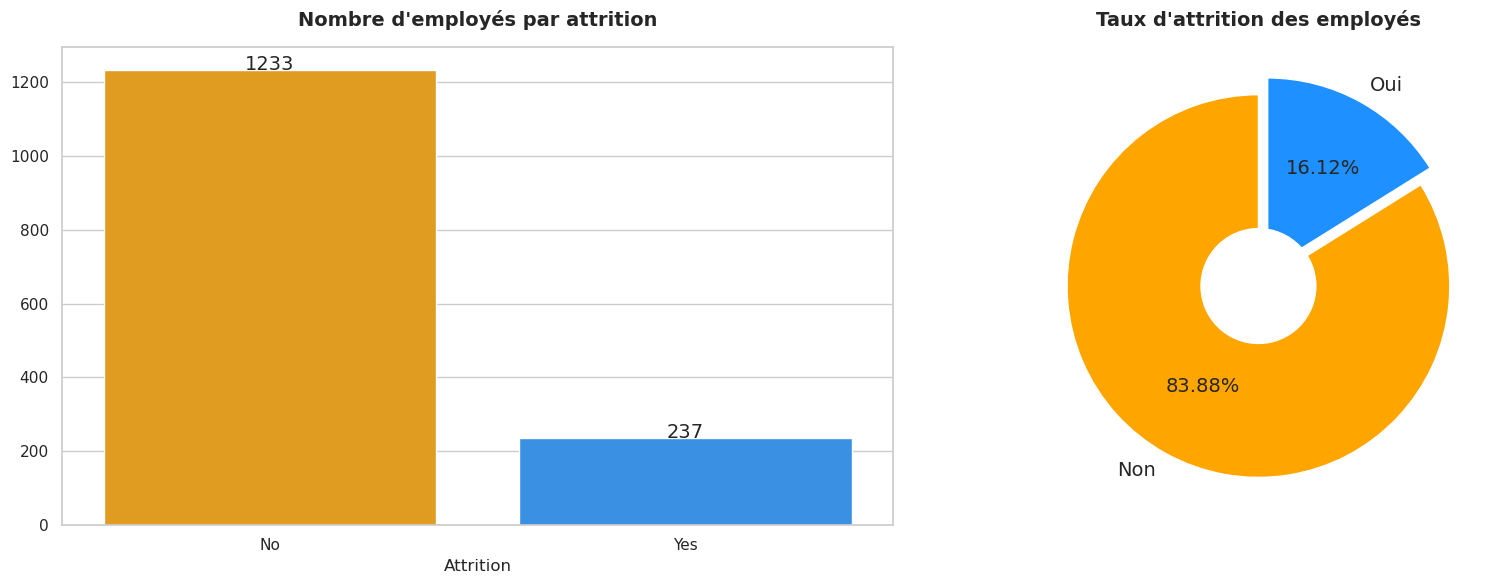

In [156]:
# Définir une palette de couleurs personnalisée
custom_palette = ['#FFA500', '#1E90FF', '#800080', '#000000', '#1E9FFF']

# Graphique 1 : Nombre d'employés par attrition
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
taux_attrition = df["Attrition"].value_counts()
sns.barplot(x=taux_attrition.index, y=taux_attrition.values, palette=custom_palette)
plt.title("Nombre d'employés par attrition", fontweight="black", size=14, pad=15)
for i, v in enumerate(taux_attrition.values):
    plt.text(i, v, v, ha="center", fontsize=14)

# Graphique 2 : Taux d'attrition des employés en pourcentage
plt.subplot(1, 2, 2)
plt.pie(taux_attrition, labels=["Non", "Oui"], autopct="%.2f%%", textprops={"size": 14},
        colors=custom_palette, explode=[0, 0.1], startangle=90)
cercle_central = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(cercle_central)
plt.title("Taux d'attrition des employés", fontweight="black", size=14, pad=15)

plt.tight_layout()
plt.show()


Le premier graphique montre le nombre d'employés par catégorie d'attrition. On observe que la majorité des employés (environ 83,88%) ne sont pas partis de l'entreprise. Le nombre d'employés ayant quitté l'entreprise est de 237, soit 16,12% du total.
Le deuxième graphique représente le taux d'attrition des employés en fonction de la variable "Attrition". On observe que le taux d'attrition est beaucoup plus élevé pour les employés qui ont répondu "Oui" à la question "Avez-vous l'intention de quitter l'entreprise dans les 6 prochains mois?".

Conclusion

L'analyse des deux graphiques permet de conclure que l'attrition des employés est un problème important pour l'entreprise. Les employés qui ont l'intention de quitter l'entreprise sont plus susceptibles de partir que ceux qui n'ont pas l'intention de partir.

L'entreprise devrait donc se concentrer sur l'identification des facteurs qui poussent les employés à vouloir quitter l'entreprise et mettre en place des stratégies pour les retenir.

In [157]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extraction des décomptes de valeurs pour la colonne spécifiée
    value_counts = df[col].value_counts().sort_index()
    
    # Premier sous-graphique : Diagramme circulaire
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution par {col}", fontweight="black", size=14, pad=15)
    colors = custom_palette
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    cercle_central = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(cercle_central)
    
    # Deuxième sous-graphique : Diagramme à barres
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Tri des valeurs dans le même ordre
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette=custom_palette)
    plt.title(f"Taux d'attrition par {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

2. Analyzing Employee Attrition by Gender.

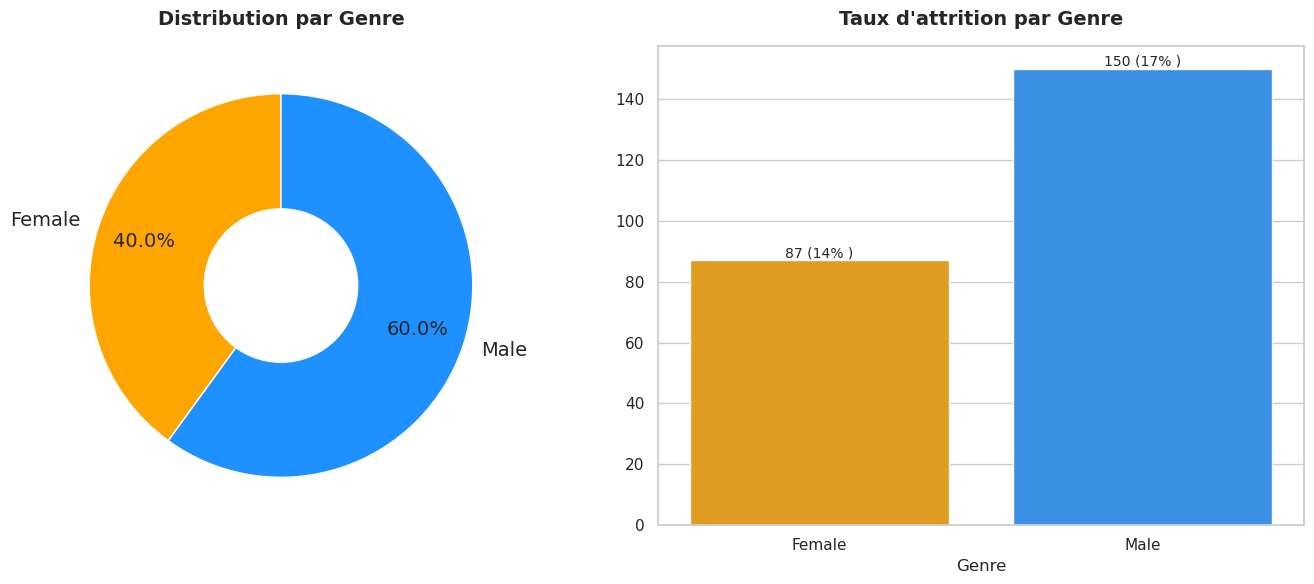

In [158]:
pie_bar_plot(df, 'Genre', 'Attrition')

Graphique 1 : Distribution des employés par genre

Le premier graphique montre une répartition par genre des employés. On observe que la majorité des employés (environ 60%) sont des hommes. Les femmes représentent 40% de la population d'employés.

Graphique 2 : Taux d'attrition par genre

Le deuxième graphique représente le taux d'attrition des employés en fonction du genre. On observe que le taux d'attrition est légèrement plus élevé pour les femmes (17%) que pour les hommes (14%).

Conclusion

L'analyse des deux graphiques permet de conclure que l'attrition des employés est un problème pour l'entreprise, mais qu'il n'y a pas de différence significative du taux d'attrition entre les hommes et les femmes.

3. Analyse de l'attrition des employés selon l'état civila

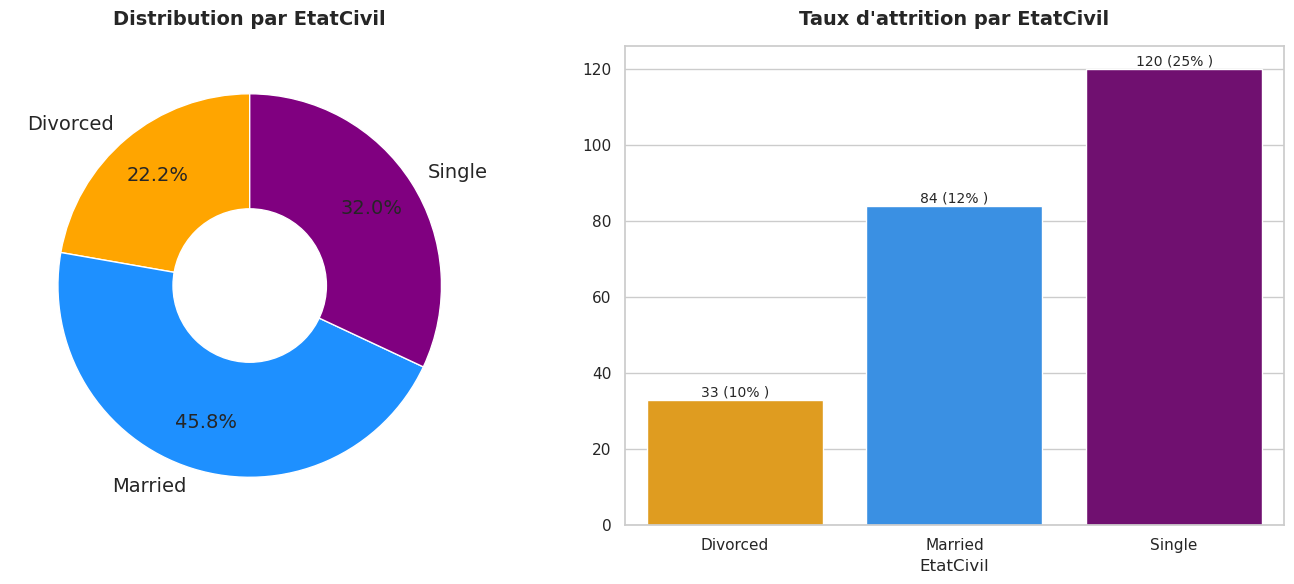

In [159]:
pie_bar_plot(df, 'EtatCivil', 'Attrition')

4.Analyse de l'attrition des employés par voyage d'affaires.e Attrition by Business Travel.

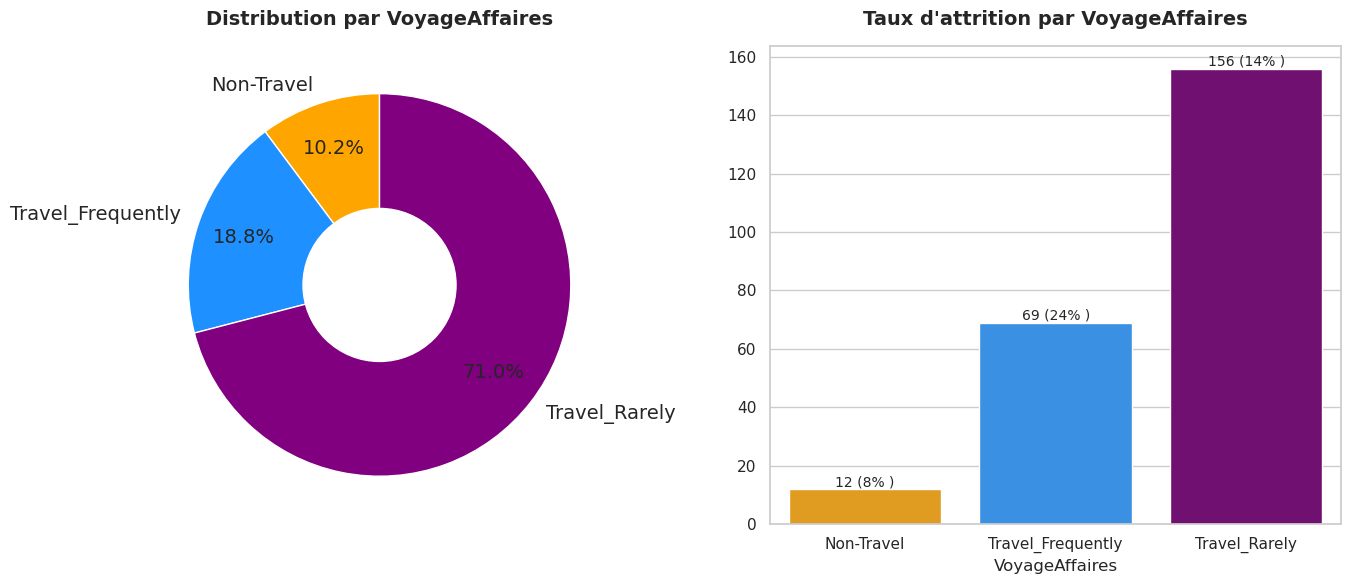

In [160]:
pie_bar_plot(df, 'VoyageAffaires', 'Attrition')

5. Analyse de l'attrition des employés par département

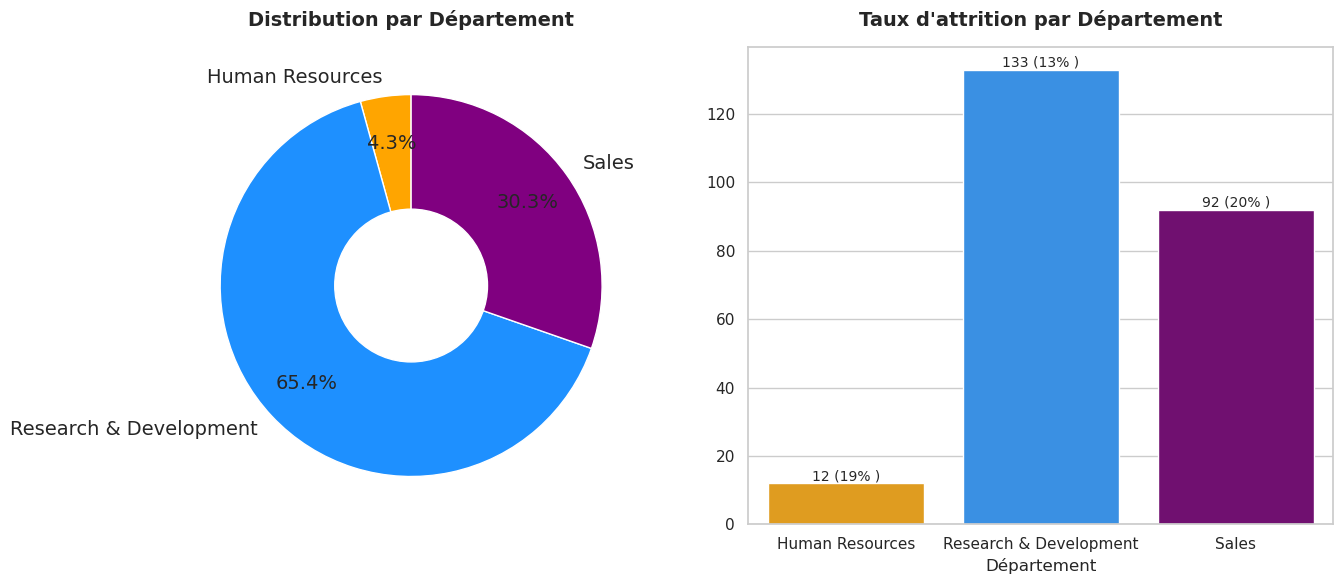

In [161]:
pie_bar_plot(df, 'Département', 'Attrition')

6. Analyse de l'attrition des employés par éducation.

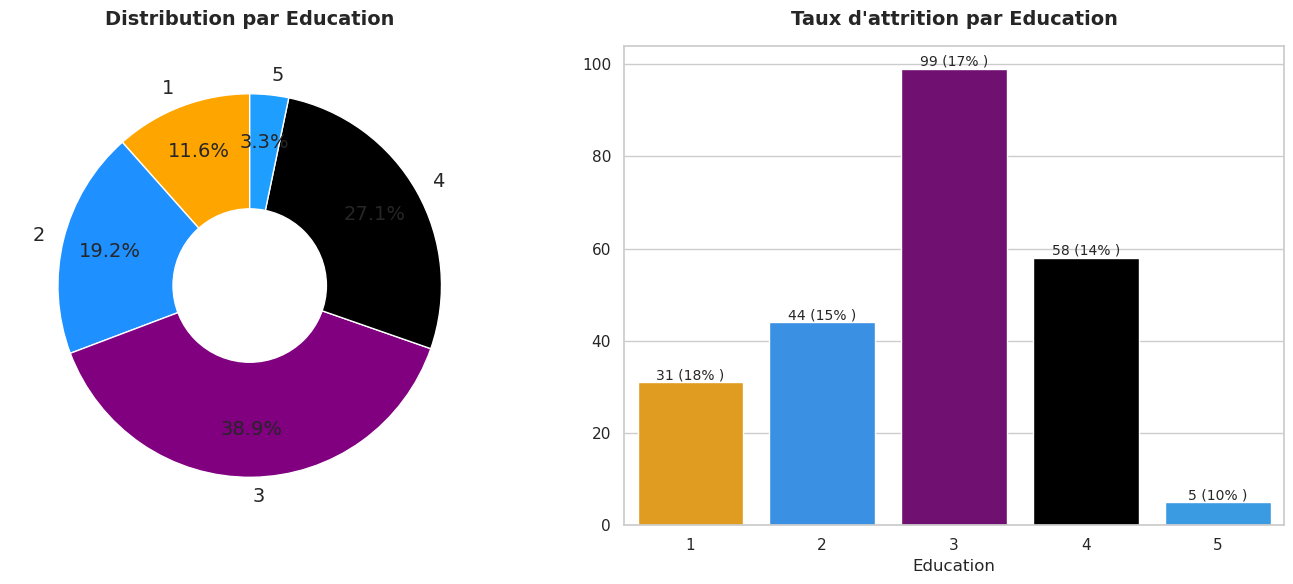

In [162]:
pie_bar_plot(df, 'Education', 'Attrition')

In [163]:
import matplotlib.ticker as ticker  # Importer le module pour les locataires

def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette=custom_palette)
    
    # Configuration de l'axe des x pour afficher des valeurs entières et aligner les étiquettes au centre
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Faire pivoter les étiquettes de l'axe des x de 90 degrés et les aligner au centre
    
    plt.title(f"Distribution par {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution par {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

7. Répartition des employés par âge

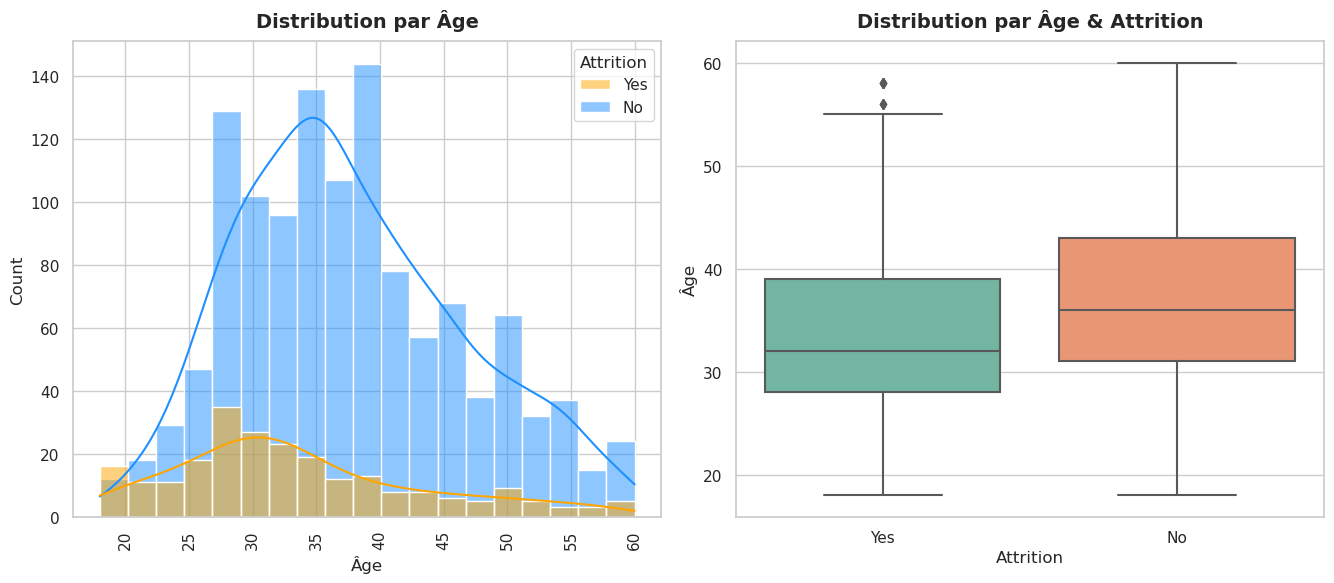

In [164]:
hist_with_hue(df, 'Âge', 'Attrition')

In [165]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=custom_palette)
    plt.title(f"Employés par {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        pourcentage_comptage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({pourcentage_comptage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Trier les valeurs pour le deuxième sous-graphique pour correspondre à l'ordre du premier sous-graphique
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    taux_attrition = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette=custom_palette)
    plt.title(f"Attrition des employés par {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        pourcentage_attrition = "{:.1f}%".format(np.round(taux_attrition[index], 1))
        plt.text(index, value, f"{value} ({pourcentage_attrition})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

8. Analyse de l'attrition des employés par domaine d'éducation

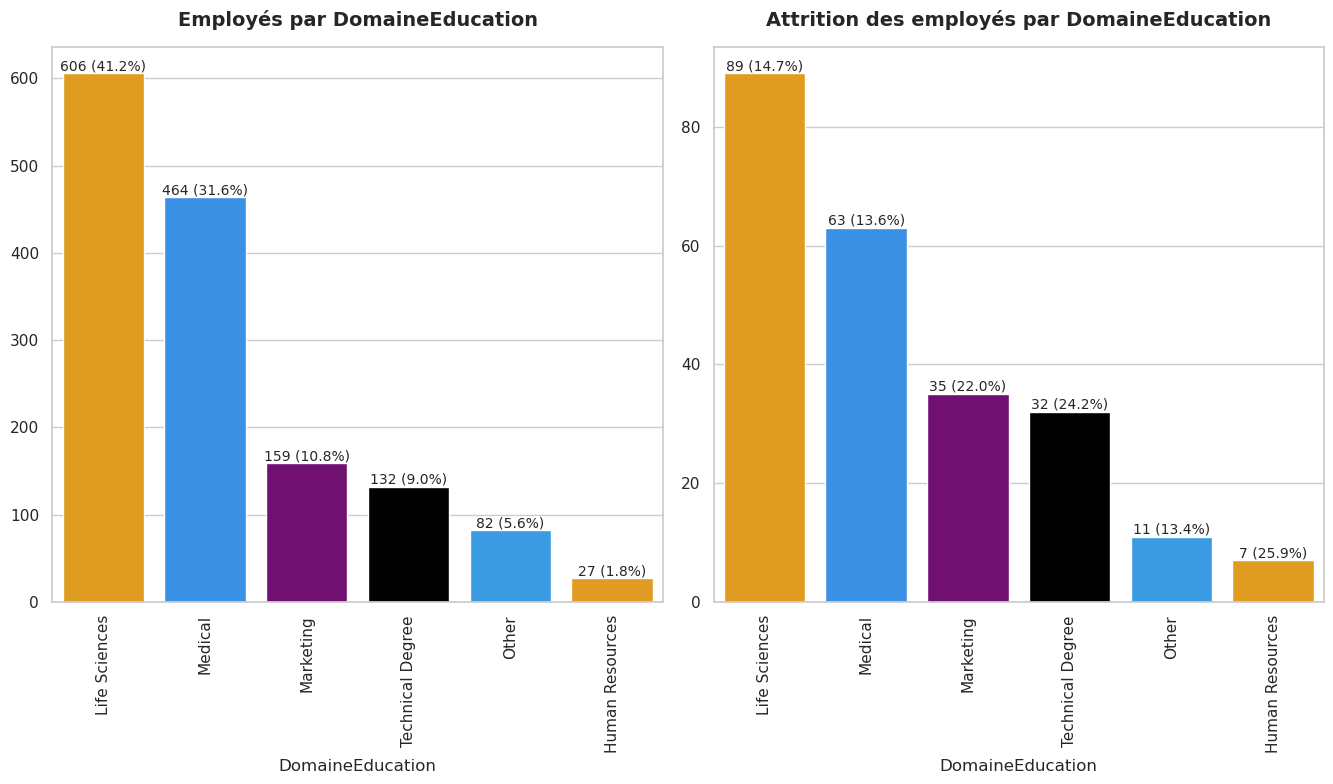

In [166]:
count_percent_plot(df, 'DomaineEducation', 'Attrition')

In [167]:
df.columns

Index(['Âge', 'Attrition', 'VoyageAffaires', 'TauxJournalier', 'Département',
       'DistanceDomicileTravail', 'Education', 'DomaineEducation',
       'SatisfactionEnvironnementale', 'Genre', 'TauxHoraire',
       'ImplicationAuTravail', 'NiveauEmploi', 'ROleprofessionnel',
       'SatisfactionaUtravail', 'EtatCivil', 'RevenuMensuel', 'TauxMensuel',
       'NombreEntreprisesTravaillEes', 'HeuresSupplEmentaires',
       'AugmentationDesalaireEnpourcentage', 'EvaluationDesPerformances',
       'SatisfactionRelationnelle', 'NiveauOptionAchatActions',
       'TotalDesannEesDeTravail', 'NombreDeFormationSuiviesAnnEeDernière',
       'EquilibreTravailViePersonnelle', 'AnneesDansEntreprise',
       'AnneesDansPosteActuel', 'AnnEesDepuis la dernierePromotion',
       'AnneesAvecManagerActuel'],
      dtype='object')

9. Analyse de l'attrition des employés en fonction de la satisfaction environnementale.

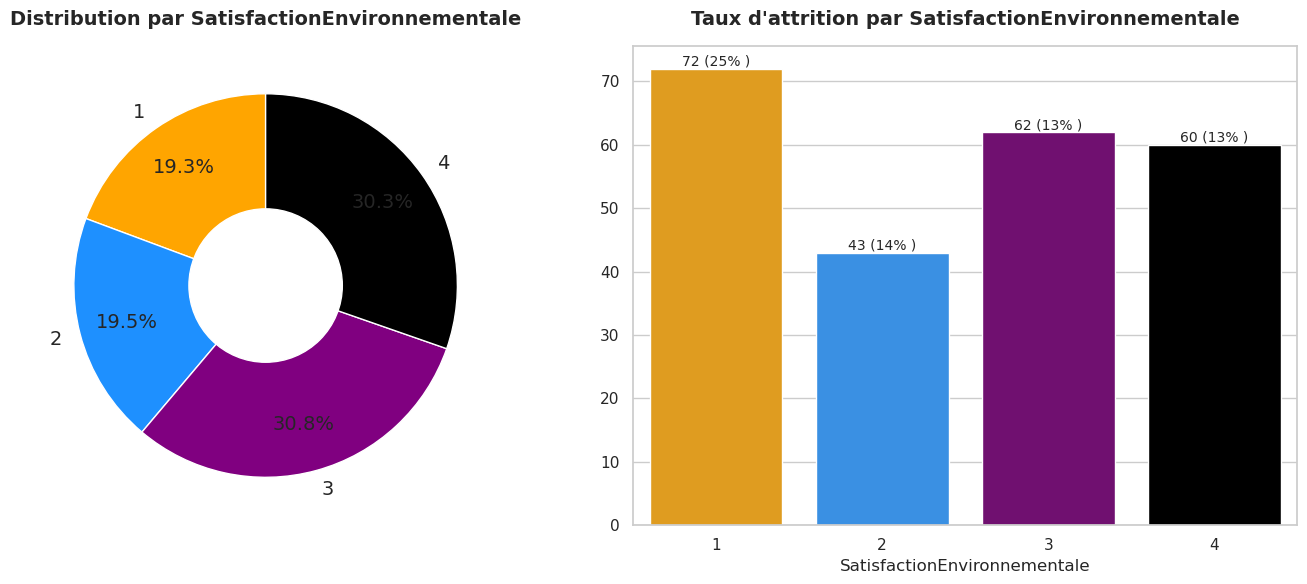

In [168]:
pie_bar_plot(df, 'SatisfactionEnvironnementale', 'Attrition')

In [169]:
Index(['Âge', 'Attrition', 'VoyageAffaires', 'TauxJournalier', 'Département',
       'DistanceDomicileTravail', 'Education', 'DomaineEducation',
       'SatisfactionEnvironnementale', 'Genre', 'TauxHoraire',
       'ImplicationAuTravail', 'NiveauEmploi', 'ROleprofessionnel',
       'SatisfactionaUtravail', 'EtatCivil', 'RevenuMensuel', 'TauxMensuel',
       'NombreEntreprisesTravaillEes', 'HeuresSupplEmentaires',
       'AugmentationDesalaireEnpourcentage', 'EvaluationDesPerformances',
       'SatisfactionRelationnelle', 'NiveauOptionAchatActions',
       'TotalDesannEesDeTravail', 'NombreDeFormationSuiviesAnnEeDernière',
       'EquilibreTravailViePersonnelle', 'AnneesDansEntreprise',
       'AnneesDansPosteActuel', 'AnnEesDepuis la dernierePromotion',
       'AnneesAvecManagerActuel'],
      dtype='object')

NameError: name 'Index' is not defined

10. Analyse de l'attrition des employés en fonction de la satisfaction au travail.¶

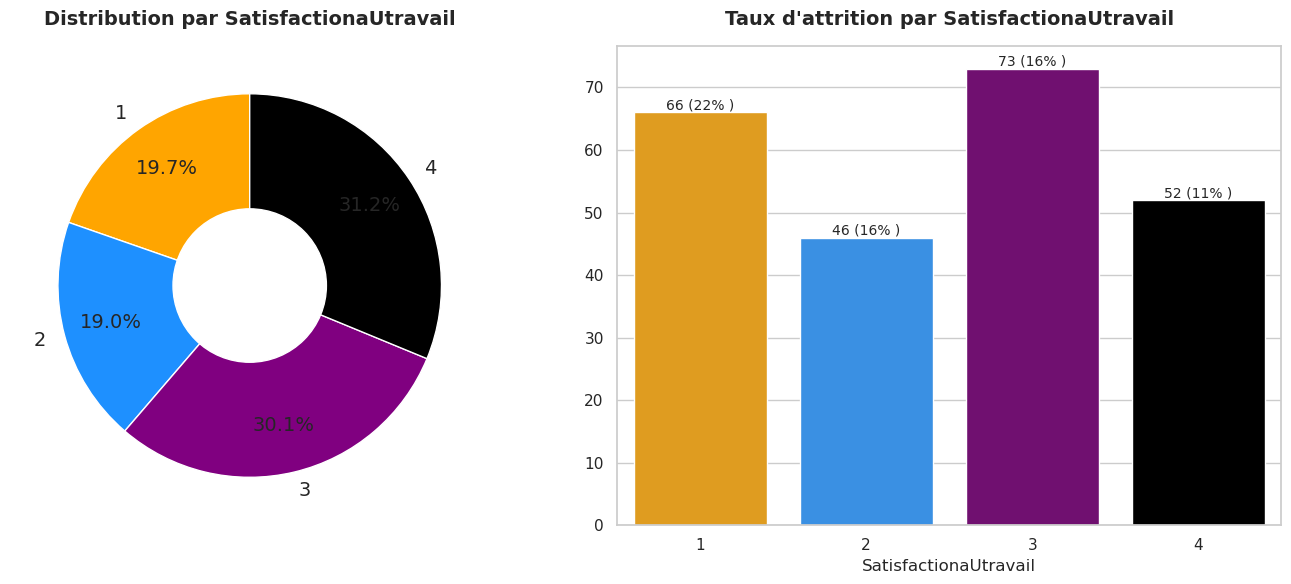

In [170]:
pie_bar_plot(df, 'SatisfactionaUtravail', 'Attrition')

11. Analyzing Employee Attrition by Relationship Satisfaction.

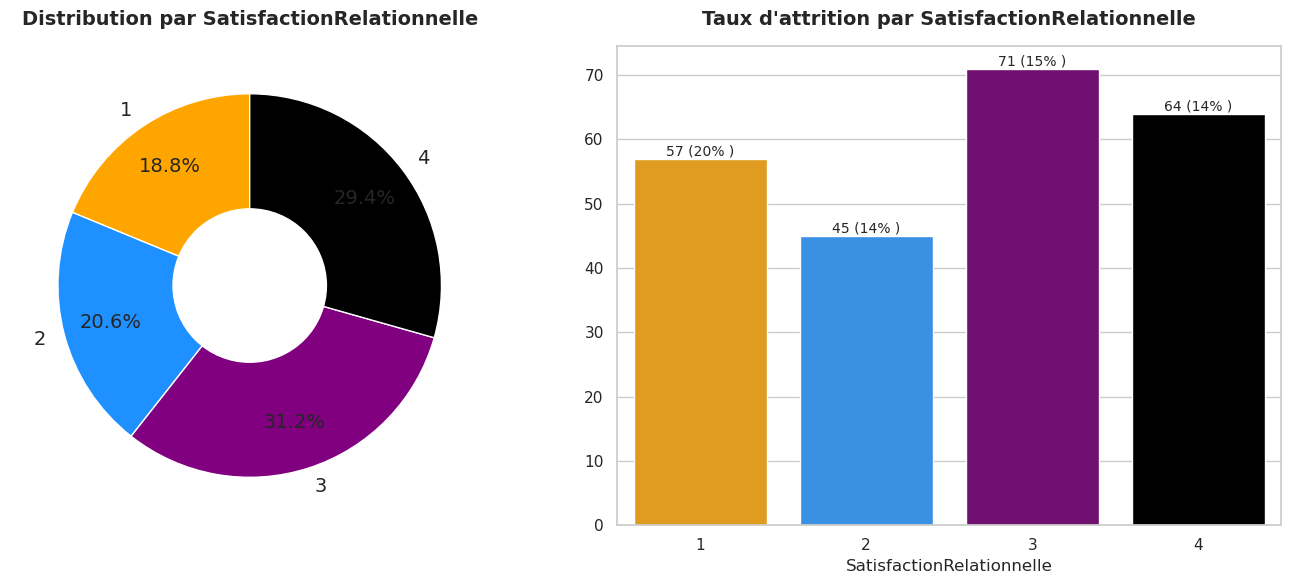

In [171]:
pie_bar_plot(df, 'SatisfactionRelationnelle', 'Attrition')

12. Analyse de l'attrition des employés en fonction de l'équilibre entre vie professionnelle et vie privée.

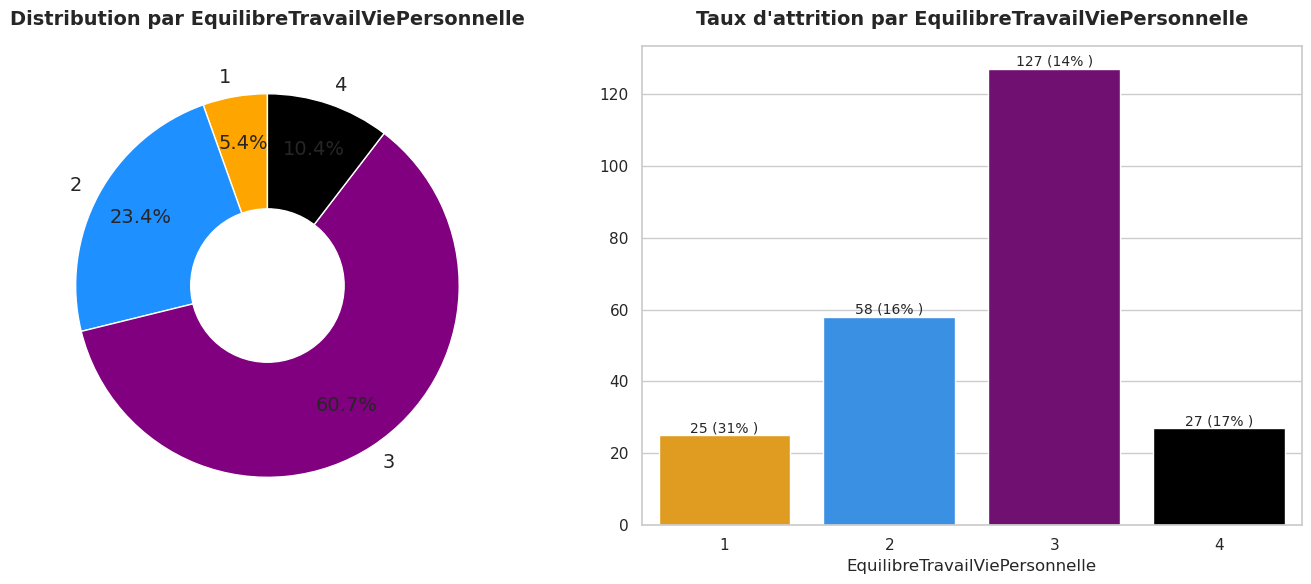

In [172]:
pie_bar_plot(df, 'EquilibreTravailViePersonnelle', 'Attrition')

13. Analyse de l'attrition des employés par évaluation des performances.

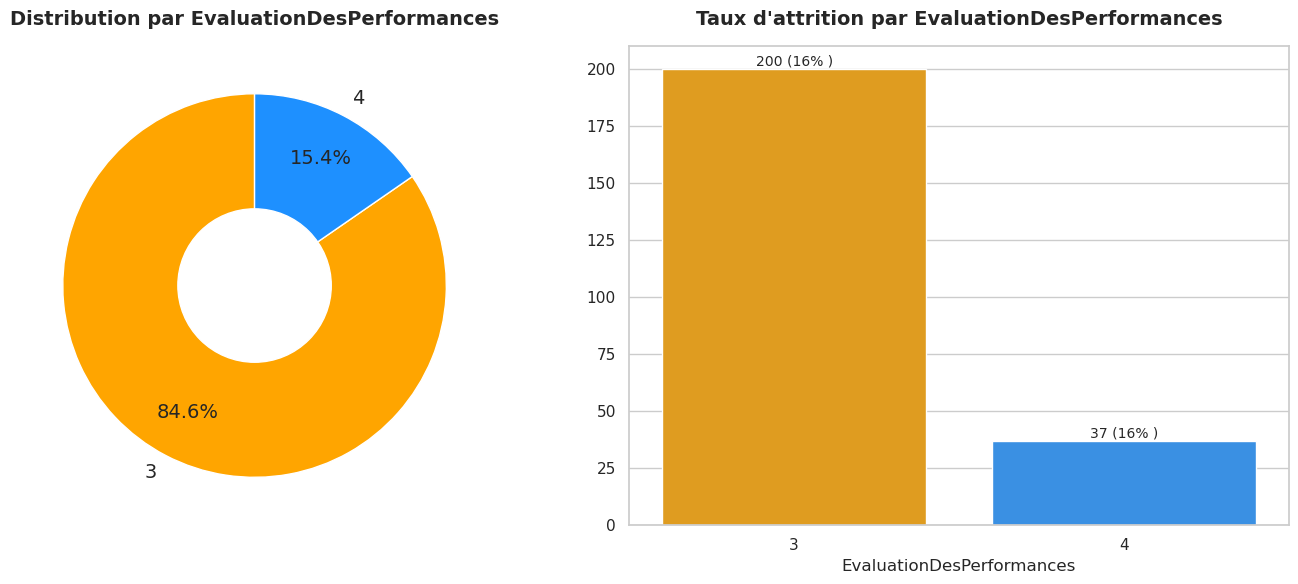

In [173]:
pie_bar_plot(df, 'EvaluationDesPerformances', 'Attrition')

14. Analyse de l'attrition des employés au fil du temps.

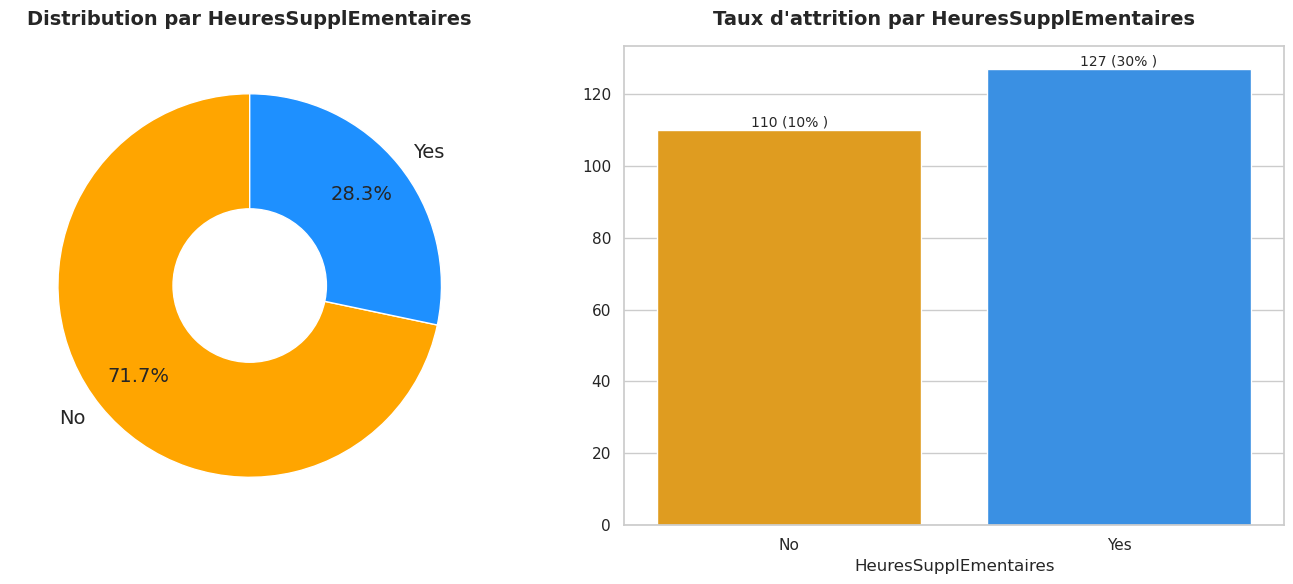

In [174]:
pie_bar_plot(df, 'HeuresSupplEmentaires', 'Attrition')

15. Analyzing Employee Attrition by Daily Rate.

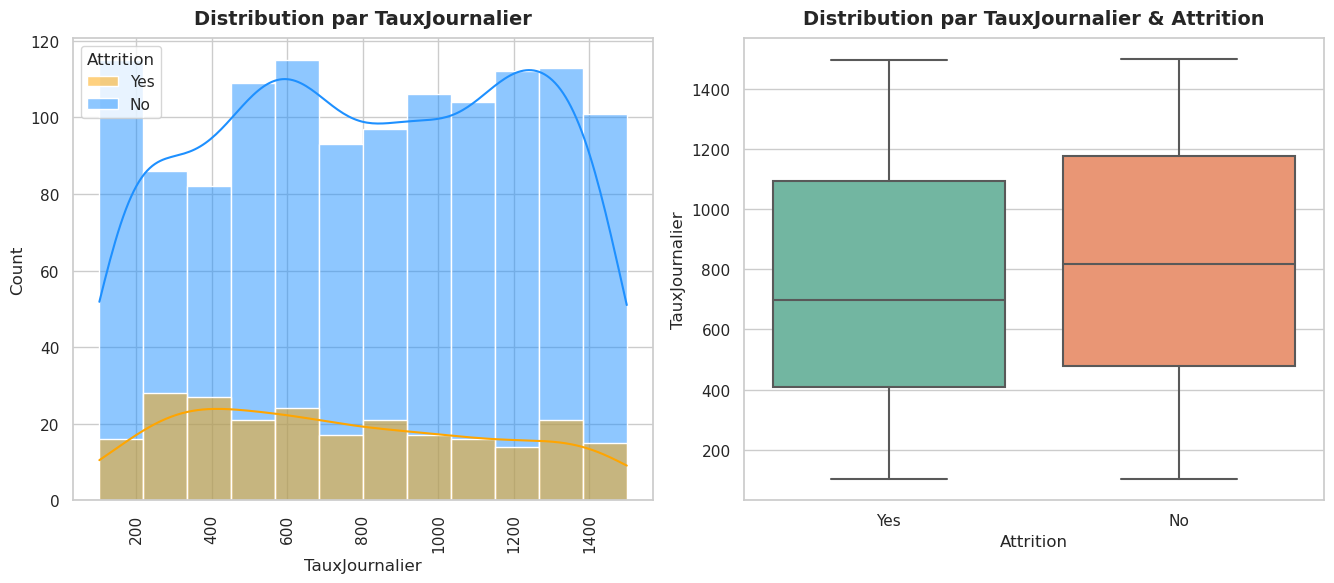

In [175]:
hist_with_hue(df, 'TauxJournalier', 'Attrition')

16. Analyzing Employee Attrition by Job Roles

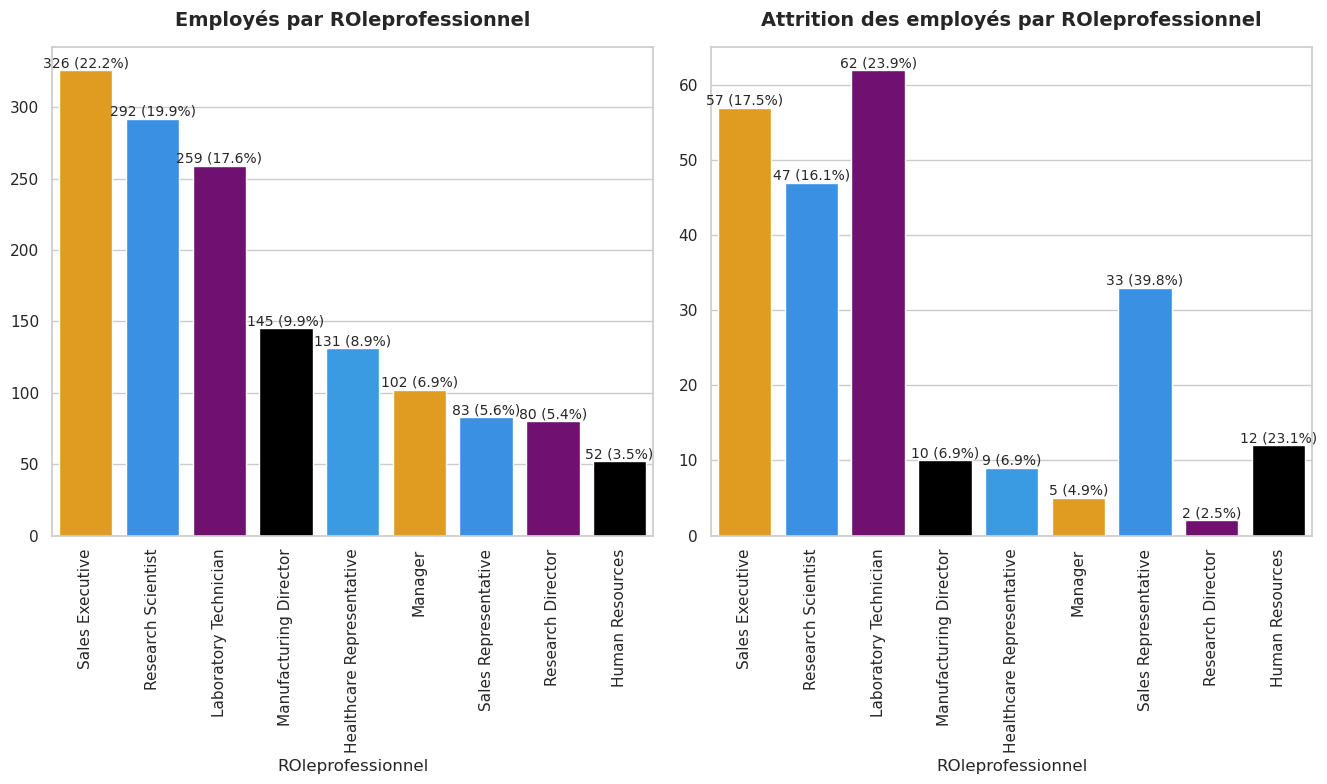

In [176]:
count_percent_plot(df, 'ROleprofessionnel', 'Attrition')

17. Analyzing Employee Attrition by Job Level.

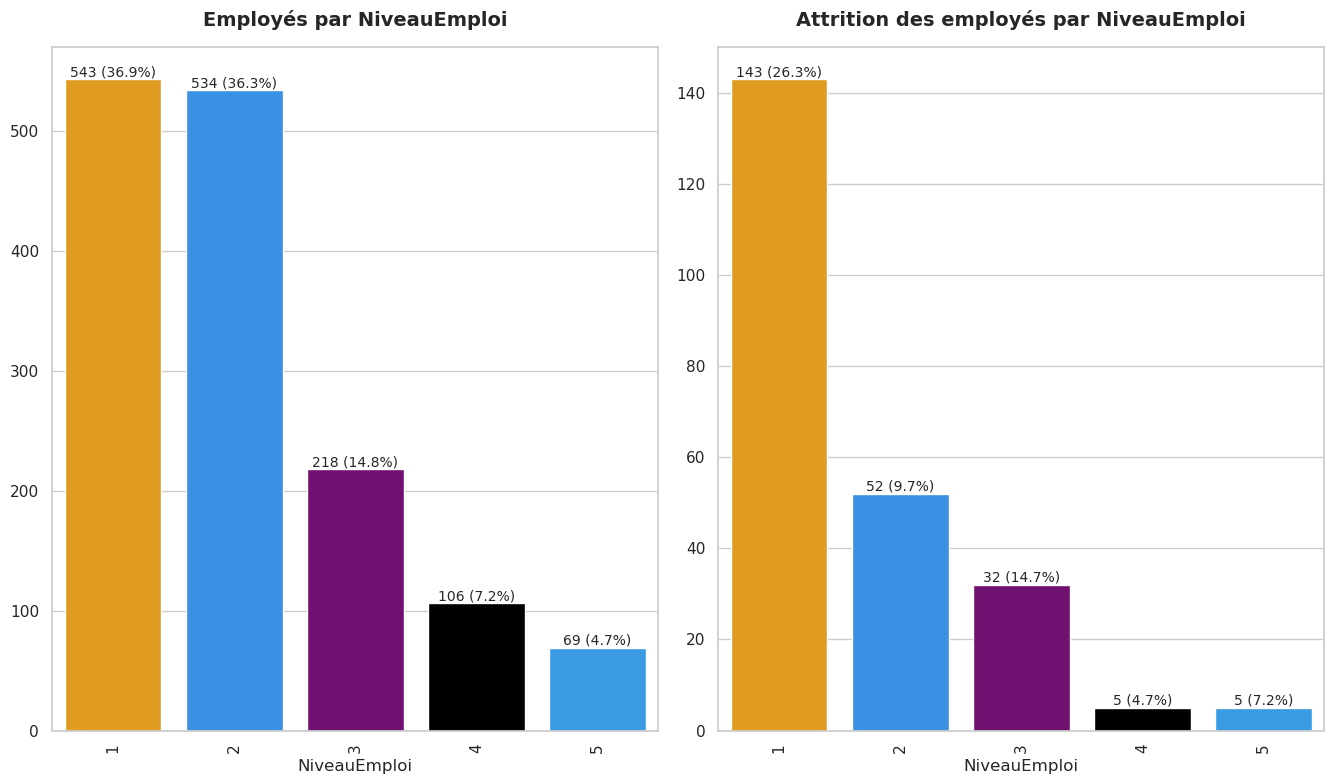

In [177]:
count_percent_plot(df, 'NiveauEmploi', 'Attrition')

18. Analyzing Employee Attrition by Monthly Income.

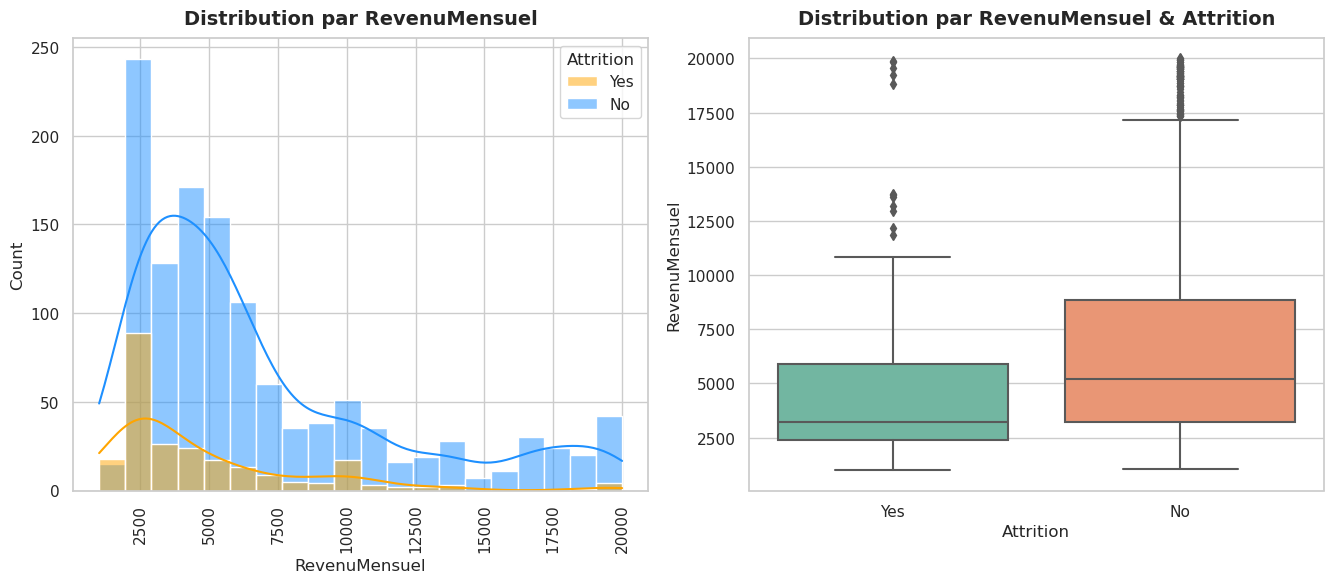

In [178]:
hist_with_hue(df, 'RevenuMensuel', 'Attrition')

19. Analyzing Employee Attrition by Monthly Rate.

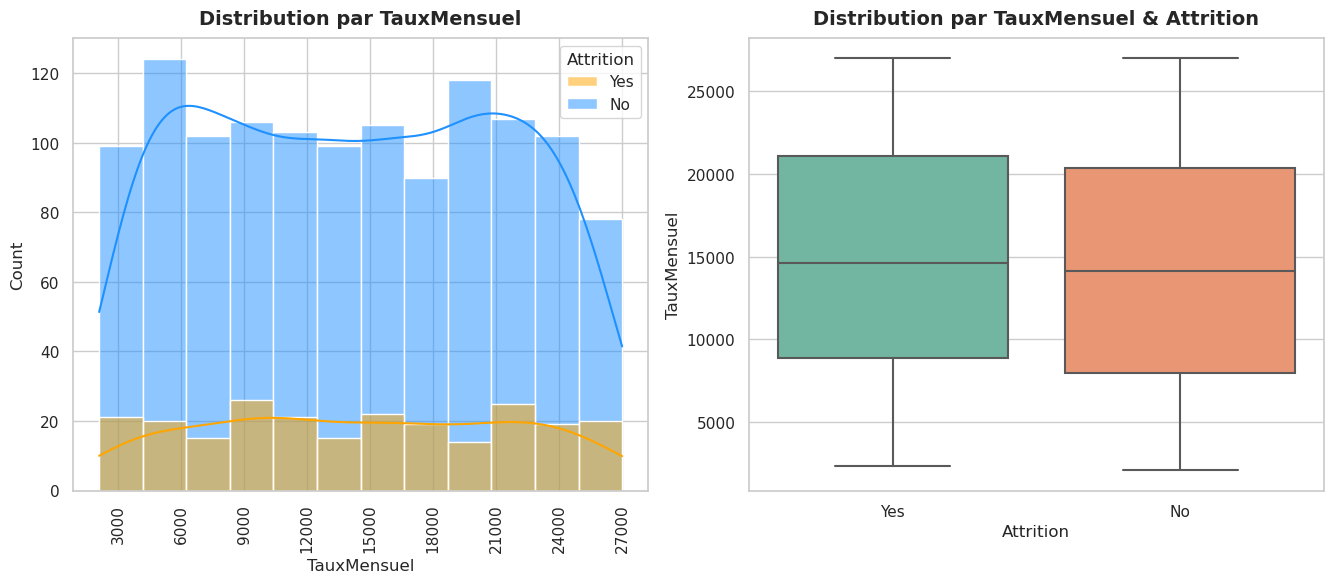

In [179]:
hist_with_hue(df, 'TauxMensuel', 'Attrition')

21 Analyse de l'attrition des employés par nombre d'entreprises travaillées.

In [180]:
print("Nombre total de valeurs uniques dans l'attribut 'NumCompaniesWorked' est =>", df["NombreEntreprisesTravaillEes"].nunique())

Nombre total de valeurs uniques dans l'attribut 'NumCompaniesWorked' est => 10


In [181]:
df["NombreEntreprisesTravaillEes"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NombreEntreprisesTravaillEes,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [182]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NombreEntreprisesTravaillEesParGRoupe"] = pd.cut(df['NombreEntreprisesTravaillEes'], bins=bin_edges, labels=bin_labels)

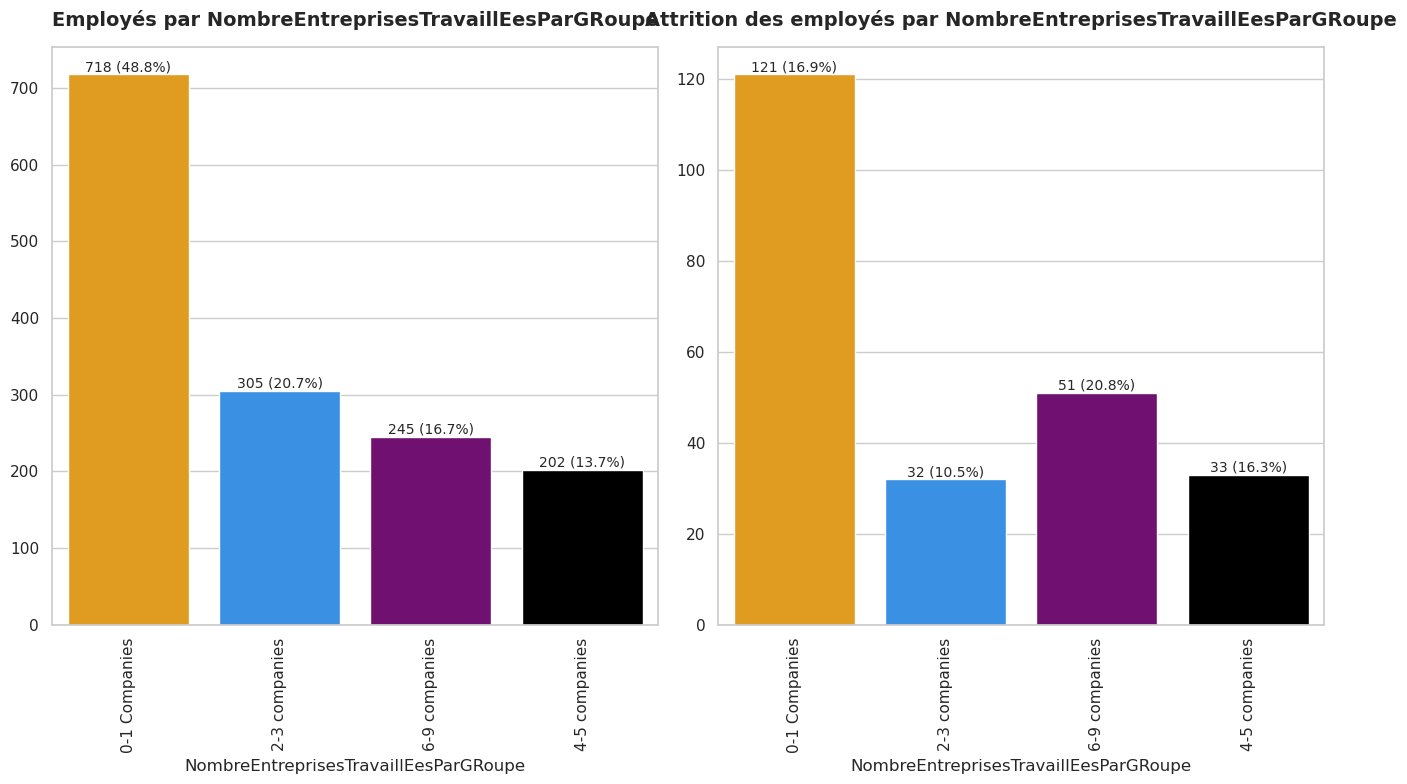

In [183]:
count_percent_plot(df, 'NombreEntreprisesTravaillEesParGRoupe', 'Attrition')

22. Analyse de l'attrition des employés par pourcentage d'augmentation des salaires.

In [ ]:
Index(['Âge', 'Attrition', 'VoyageAffaires', 'TauxJournalier', 'Département',
       'DistanceDomicileTravail', 'Education', 'DomaineEducation',
       'SatisfactionEnvironnementale', 'Genre', 'TauxHoraire',
       'ImplicationAuTravail', 'NiveauEmploi', 'ROleprofessionnel',
       'SatisfactionaUtravail', 'EtatCivil', 'RevenuMensuel', 'TauxMensuel',
       'NombreEntreprisesTravaillEes', 'HeuresSupplEmentaires',
       'AugmentationDesalaireEnpourcentage', 'EvaluationDesPerformances',
       'SatisfactionRelationnelle', 'NiveauOptionAchatActions',
       'TotalDesannEesDeTravail', 'NombreDeFormationSuiviesAnnEeDernière',
       'EquilibreTravailViePersonnelle', 'AnneesDansEntreprise',
       'AnneesDansPosteActuel', 'AnnEesDepuis la dernierePromotion',
       'AnneesAvecManagerActuel'],
      dtype='object')

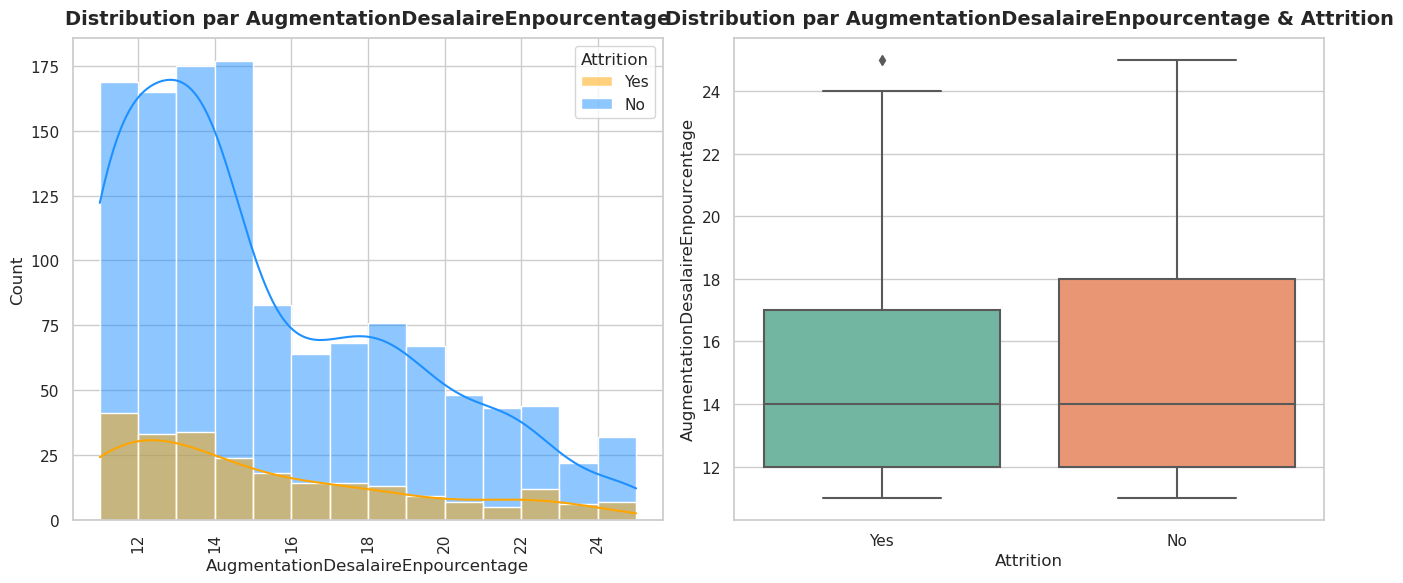

In [184]:
hist_with_hue(df, 'AugmentationDesalaireEnpourcentage', 'Attrition')

23. Analyse de l'attrition des employés par années de travail totales.

In [186]:
print("Nombre total de valeurs uniques dans l'attribut 'TotalDesannEesDeTravail' est =>", df["TotalDesannEesDeTravail"].nunique())


Nombre total de valeurs uniques dans l'attribut 'TotalDesannEesDeTravail' est => 40


In [187]:
df["TotalDesannEesDeTravail"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
TotalDesannEesDeTravail,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0


In [188]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalDesannEesDeTravailGroup"] = pd.cut(df['TotalDesannEesDeTravail'], bins=bin_edges, labels=bin_labels)

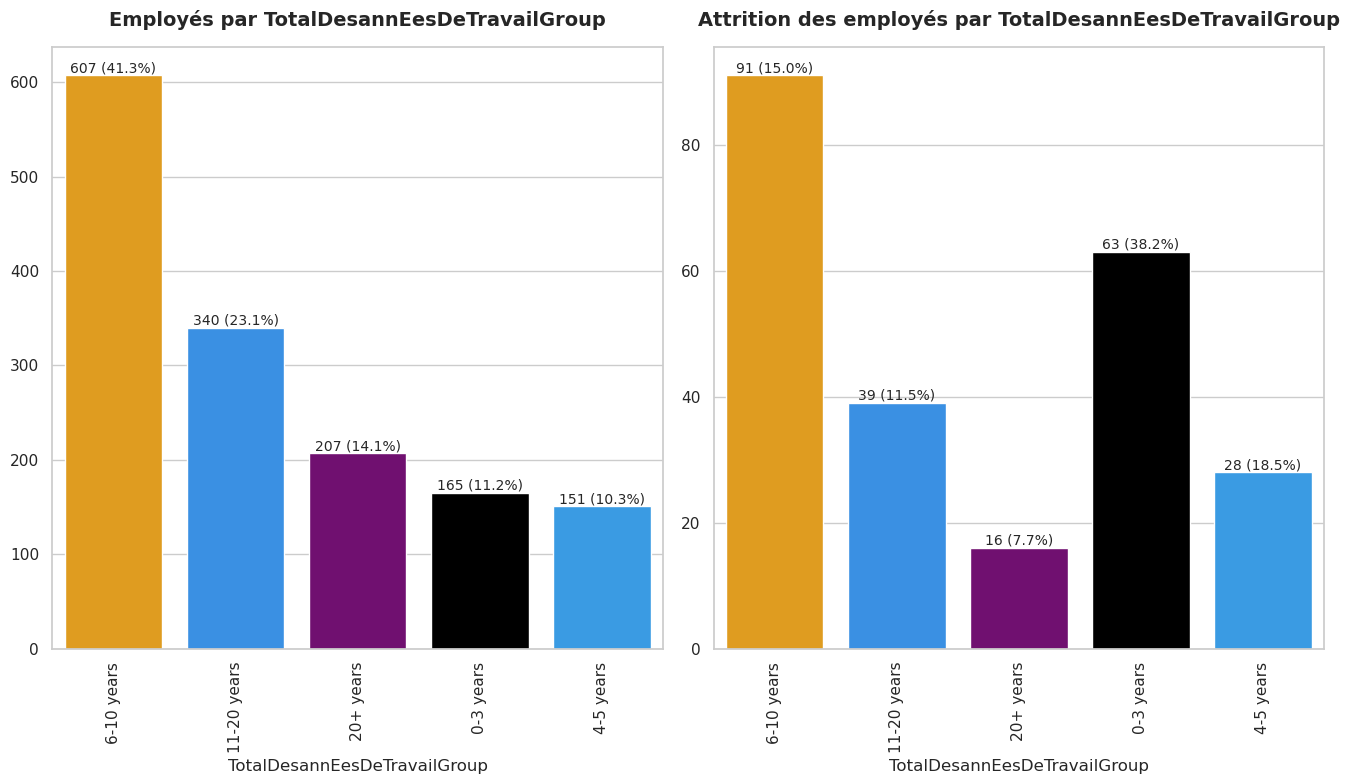

In [189]:
count_percent_plot(df, 'TotalDesannEesDeTravailGroup', 'Attrition')

In [ ]:
# encoder les variables categorielles

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Encodage des donnees</span></b> </div>

In [194]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [195]:
from sklearn.preprocessing import LabelEncoder

def label_encoder_df(dataframe, variables_categorielles):
  encoder = LabelEncoder()
  for variable in variables_categorielles:
    dataframe[variable] = encoder.fit_transform(dataframe[variable])
  return dataframe



In [196]:
label_encoder_df(df,cat_cols)

,Âge,Attrition,VoyageAffaires,TauxJournalier,Département,DistanceDomicileTravail,Education,DomaineEducation,SatisfactionEnvironnementale,Genre,...,NiveauOptionAchatActions,TotalDesannEesDeTravail,NombreDeFormationSuiviesAnnEeDernière,EquilibreTravailViePersonnelle,AnneesDansEntreprise,AnneesDansPosteActuel,AnnEesDepuis la dernierePromotion,AnneesAvecManagerActuel,NombreEntreprisesTravaillEesParGRoupe,TotalDesannEesDeTravailGroup
0,41,1,2,1102,2,1,2,1,2,0,...,0,8,0,1,6,4,0,5,6-9 companies,6-10 years
1,49,0,1,279,1,8,1,1,3,1,...,1,10,3,3,10,7,1,7,0-1 Companies,6-10 years
2,37,1,2,1373,1,2,2,4,4,1,...,0,7,3,3,0,0,0,0,6-9 companies,6-10 years
3,33,0,1,1392,1,3,4,1,4,0,...,0,8,3,3,8,7,3,0,0-1 Companies,6-10 years
4,27,0,2,591,1,2,1,3,1,1,...,1,6,3,3,2,2,2,2,6-9 companies,6-10 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,1,17,3,3,5,2,0,3,4-5 companies,11-20 years
1466,39,0,2,613,1,6,1,3,4,1,...,1,9,5,3,7,7,1,7,4-5 companies,6-10 years
1467,27,0,2,155,1,4,3,1,2,1,...,1,6,0,3,6,2,0,3,0-1 Companies,6-10 years
1468,49,0,1,1023,2,2,3,3,4,1,...,0,17,3,2,9,6,0,8,2-3 companies,11-20 years


In [197]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Âge                                    1470 non-null   int64   
 1   Attrition                              1470 non-null   int64   
 2   VoyageAffaires                         1470 non-null   int64   
 3   TauxJournalier                         1470 non-null   int64   
 4   Département                            1470 non-null   int64   
 5   DistanceDomicileTravail                1470 non-null   int64   
 6   Education                              1470 non-null   int64   
 7   DomaineEducation                       1470 non-null   int64   
 8   SatisfactionEnvironnementale           1470 non-null   int64   
 9   Genre                                  1470 non-null   int64   
 10  TauxHoraire                            1470 non-null   int64


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Diviser les données et Les Normaliser</span></b> </div>

In [206]:
x = df.drop(['Attrition','NombreEntreprisesTravaillEesParGRoupe','TotalDesannEesDeTravailGroup'], axis=1)
y = df[['Attrition']]

from sklearn.preprocessing import StandardScaler
# Créer une instance de StandardScaler
scaler = StandardScaler()

# Ajuster le scaler aux données d'entraînement et transformer les données
x_scaled = scaler.fit_transform(x)

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'> Divisez les données en formation et test (à l'échelle)</span></b> </div>


In [208]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [275]:
# algorithms Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'> Création d'un modèle de référence</span></b> </div>


In [244]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.datasets import make_classification 

In [245]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'>Création de modèles pour des données mises à l'échelle</span></b> </div>


In [271]:
from sklearn.model_selection import cross_val_score

def model_prediction(model):
    # Entraînement du modèle
    model.fit(x_train1, y_train1)
    
    # Prédictions sur les données d'entraînement et de test
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    
    # Probabilités prédites pour les données de test
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    
    # Calcul des métriques d'évaluation
    a = accuracy_score(y_train1, x_train_pred1) * 100
    b = accuracy_score(y_test1, x_test_pred1) * 100
    c = precision_score(y_test1, x_test_pred1)
    d = recall_score(y_test1, x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1, x_test_pred1)
   
    # Enregistrement des scores dans les listes définies globalement
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    
    # Affichage des scores d'évaluation
    print("\n------------------------------------------------------------------------")
    print(f"Score de précision de {model} sur les données d'entraînement est :", a)
    print(f"Score de précision de {model} sur les données de test est :", b)
    print(f"Score de précision de {model} est :", c)
    print(f"Score de rappel de {model} est :", d)
    print(f"Score de l'aire sous la courbe ROC de {model} est :", e)
    print(f"Score de F1 de {model} est :", f)
  
    # Affichage du rapport de classification
    print("\n------------------------------------------------------------------------")
    print(f"Rapport de classification de {model} est :")
    print(classification_report(y_test1, x_test_pred1))

     # Affichage de la matrice de confusion
    print("\n------------------------------------------------------------------------")
    print(f"Matrice de confusion de {type(model).__name__} est :")
    cm = confusion_matrix(y_test1, x_test_pred1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")  # Utilisation de la palette YlGnBu (jaune-vert-bleu)
    plt.xlabel('Étiquettes prédites')
    plt.ylabel('Étiquettes réelles')
    plt.title(f'Matrice de confusion - {type(model).__name__}', pad=20, fontweight="black")
    plt.show()
    
    # Affichage de la courbe ROC
    print("\n------------------------------------------------------------------------")
    y_pred_proba1 = model.predict_proba(x_test1)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.title("Courbe ROC", pad=20, fontweight="black")
    plt.legend()
    plt.show()
    
    # Validation croisée
    print("\n------------------------------------------------------------------------")
    print(f"Validation croisée de {model} :")
    cv_scores = cross_val_score(model, x_train1, y_train1, cv=5, scoring='accuracy')
    print(f"Scores de validation croisée : {cv_scores}")
    print(f"Moyenne des scores de validation croisée : {np.mean(cv_scores):.2f}")


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'> 1. Linear Regressor Model</span></b> </div>

In [272]:
from sklearn.metrics import classification_report



------------------------------------------------------------------------
Score de précision de LogisticRegression() sur les données d'entraînement est : 86.98979591836735
Score de précision de LogisticRegression() sur les données de test est : 89.45578231292517
Score de précision de LogisticRegression() est : 0.7
Score de rappel de LogisticRegression() est : 0.358974358974359
Score de l'aire sous la courbe ROC de LogisticRegression() est : 0.7712418300653595
Score de F1 de LogisticRegression() est : 0.4745762711864407

------------------------------------------------------------------------
Rapport de classification de LogisticRegression() est :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294


-----------------

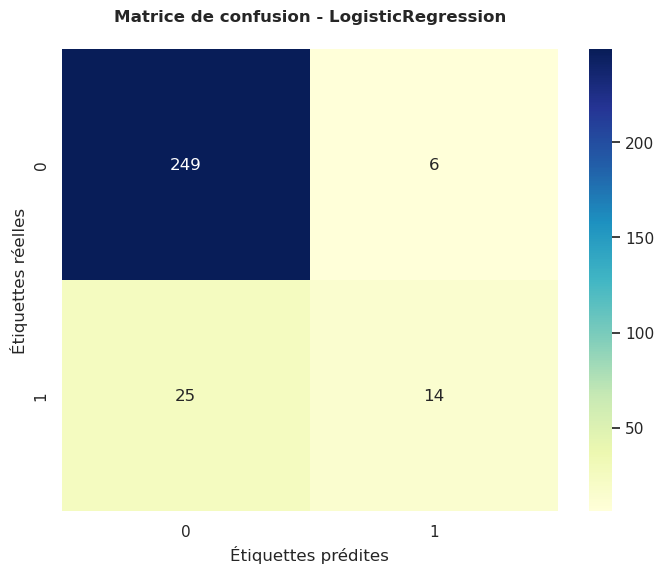


------------------------------------------------------------------------


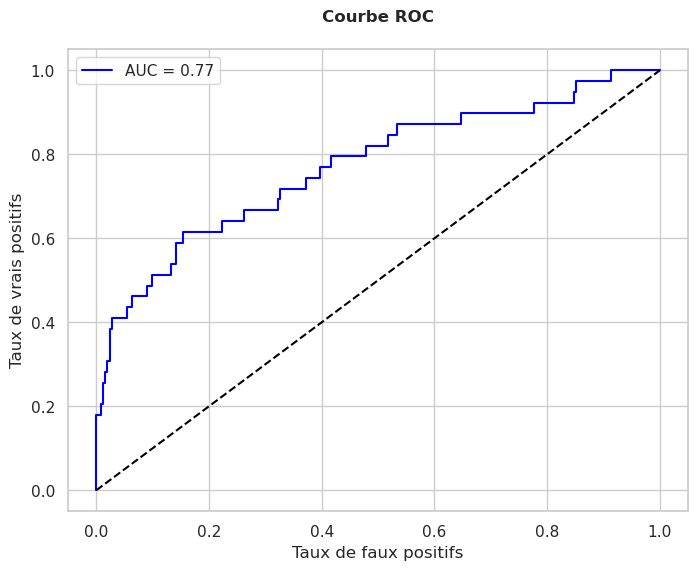


------------------------------------------------------------------------
Validation croisée de LogisticRegression() :
Scores de validation croisée : [0.84745763 0.86808511 0.83829787 0.85957447 0.84680851]
Moyenne des scores de validation croisée : 0.85


In [273]:
model_prediction(LogisticRegression())

Les scores et le rapport de classification obtenus pour le modèle LogisticRegression() permettent une interprétation détaillée de sa performance :

1. **Score de précision** :
   - Sur les données d'entraînement : 86.99%
   - Sur les données de test : 89.46%
   - Global : 70.0%

   **Interprétation** : Le modèle parvient à prédire correctement l'attrition des employés dans environ 89.46% des cas sur les données de test, ce qui indique une bonne capacité de généralisation.

2. **Score de rappel** :
   - Global : 35.90%

   **Interprétation** : Le rappel (recall) de 35.90% signifie que le modèle identifie environ 35.90% des employés qui ont réellement quitté l'entreprise (classe 1). Cela indique que le modèle pourrait ne pas détecter tous les cas d'attrition, ce qui est un aspect à améliorer.

3. **Score de l'aire sous la courbe ROC (AUC-ROC)** :
   - AUC-ROC : 0.771

   **Interprétation** : Un score AUC-ROC de 0.771 montre que le modèle est raisonnablement capable de distinguer entre les employés qui restent et ceux qui partent, avec une performance supérieure à un modèle aléatoire (AUC-ROC = 0.5).

4. **Score de F1** :
   - F1-score : 0.475

   **Interprétation** : Le F1-score combine à la fois la précision et le rappel en une seule métrique. Un F1-score de 0.475 montre que le modèle atteint un équilibre entre la précision et le rappel, bien que ce dernier soit relativement bas.

5. **Rapport de classification** :
   - Précision, rappel, F1-score et support pour chaque classe (0 et 1).

   **Interprétation** : Le rapport de classification détaille la performance du modèle pour chaque classe. Par exemple, pour la classe 1 (attrition), le modèle a une précision de 70% et un rappel de 36%, ce qui indique une capacité modérée à identifier les employés effectivement susceptibles de quitter l'entreprise.

En résumé, bien que le modèle LogisticRegression montre une précision globale élevée sur les données de test, il présente un rappel relativement faible pour la détection de l'attrition (classe 1). Cela suggère qu'il pourrait manquer certains cas d'attrition, ce qui pourrait être amélioré par des ajustements dans la stratégie de modèle ou l'utilisation de techniques d'équilibrage des classes.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-color:orange"><b><span style='color:black'> 5. Random Forest</span></b> </div>



------------------------------------------------------------------------
Score de précision de RandomForestClassifier() sur les données d'entraînement est : 100.0
Score de précision de RandomForestClassifier() sur les données de test est : 87.07482993197279
Score de précision de RandomForestClassifier() est : 0.5714285714285714
Score de rappel de RandomForestClassifier() est : 0.10256410256410256
Score de l'aire sous la courbe ROC de RandomForestClassifier() est : 0.7267973856209149
Score de F1 de RandomForestClassifier() est : 0.17391304347826086

------------------------------------------------------------------------
Rapport de classification de RandomForestClassifier() est :
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      

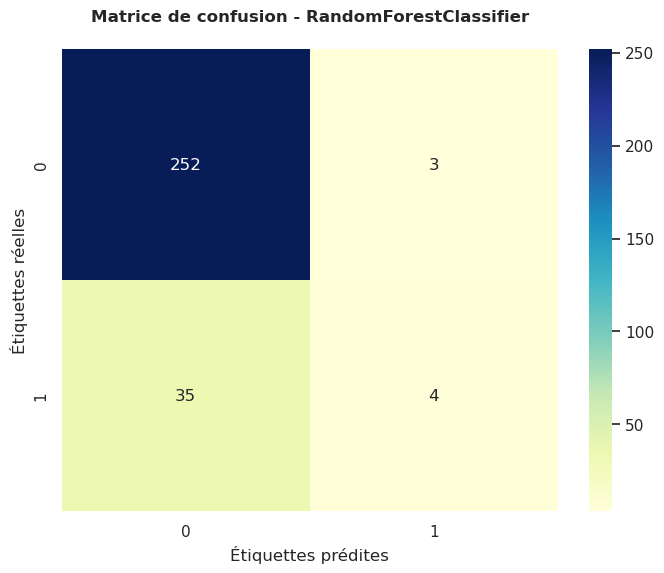


------------------------------------------------------------------------


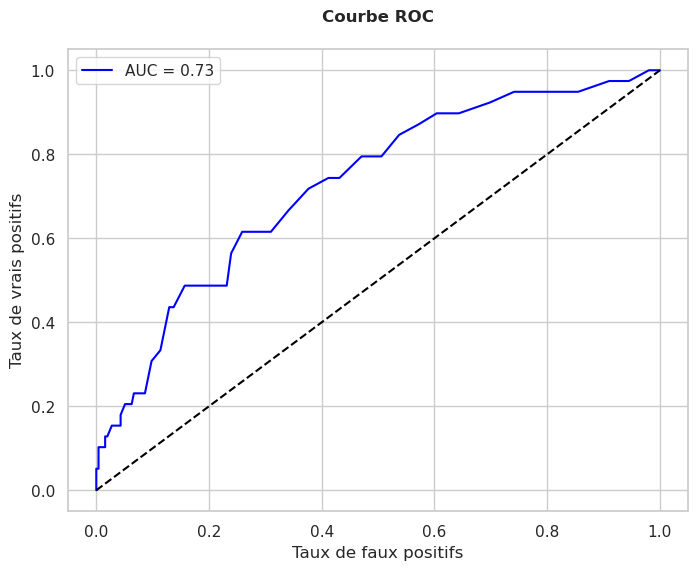


------------------------------------------------------------------------
Validation croisée de RandomForestClassifier() :
Scores de validation croisée : [0.84745763 0.86382979 0.83829787 0.83829787 0.85957447]
Moyenne des scores de validation croisée : 0.85


In [274]:
model_prediction(RandomForestClassifier())

Les scores et le rapport de classification obtenus pour le modèle RandomForestClassifier() permettent une interprétation détaillée de sa performance :

1. **Score de précision** :
   - Sur les données d'entraînement : 100.0%
   - Sur les données de test : 87.07%
   - Global : 57.14%

   **Interprétation** : Le modèle RandomForestClassifier() présente une précision de 87.07% sur les données de test, ce qui indique une bonne capacité à prédire correctement l'attrition des employés. Cependant, le score global de précision (57.14%) montre qu'il génère plus de faux positifs que le modèle LogisticRegression().

2. **Score de rappel** :
   - Global : 10.26%

   **Interprétation** : Le rappel (recall) de 10.26% indique que le modèle RandomForestClassifier() a du mal à identifier les employés réellement enclins à quitter l'entreprise (classe 1). Il manque donc la plupart des cas d'attrition.

3. **Score de l'aire sous la courbe ROC (AUC-ROC)** :
   - AUC-ROC : 0.727

   **Interprétation** : Un score AUC-ROC de 0.727 montre que le modèle RandomForestClassifier() est capable de distinguer entre les employés qui restent et ceux qui partent avec une performance modérée, légèrement inférieure à celle du modèle LogisticRegression().

4. **Score de F1** :
   - F1-score : 0.174

   **Interprétation** : Le faible F1-score de 0.174 montre que le modèle RandomForestClassifier() a un équilibre médiocre entre la précision et le rappel, en raison d'un rappel très bas pour la classe 1.

5. **Rapport de classification** :
   - Précision, rappel, F1-score et support pour chaque classe (0 et 1).

   **Interprétation** : Le rapport de classification montre que le modèle a une précision élevée pour la classe 0 (non attrition), mais une performance médiocre pour la classe 1 (attrition), avec une précision de seulement 57% et un rappel de seulement 10%.

En résumé, bien que le modèle RandomForestClassifier() montre une précision élevée sur les données d'entraînement, il a des performances moins bonnes sur les données de test, en particulier en ce qui concerne le rappel pour la classe 1. Cela suggère qu'il pourrait bénéficier d'ajustements supplémentaires pour améliorer sa capacité à détecter correctement les cas d'attrition des employés.


------------------------------------------------------------------------
Score de précision de SVC(probability=True) sur les données d'entraînement est : 91.75170068027211
Score de précision de SVC(probability=True) sur les données de test est : 88.77551020408163
Score de précision de SVC(probability=True) est : 1.0
Score de rappel de SVC(probability=True) est : 0.15384615384615385
Score de l'aire sous la courbe ROC de SVC(probability=True) est : 0.7940673705379587
Score de F1 de SVC(probability=True) est : 0.2666666666666667

------------------------------------------------------------------------
Rapport de classification de SVC(probability=True) est :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294


--------

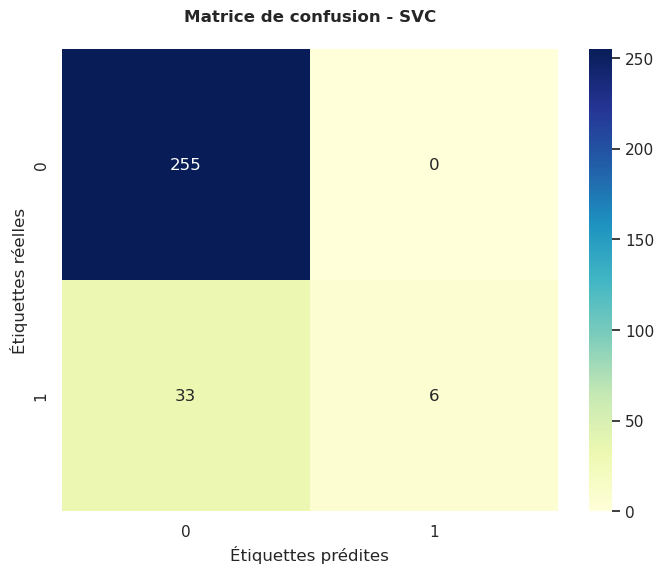


------------------------------------------------------------------------


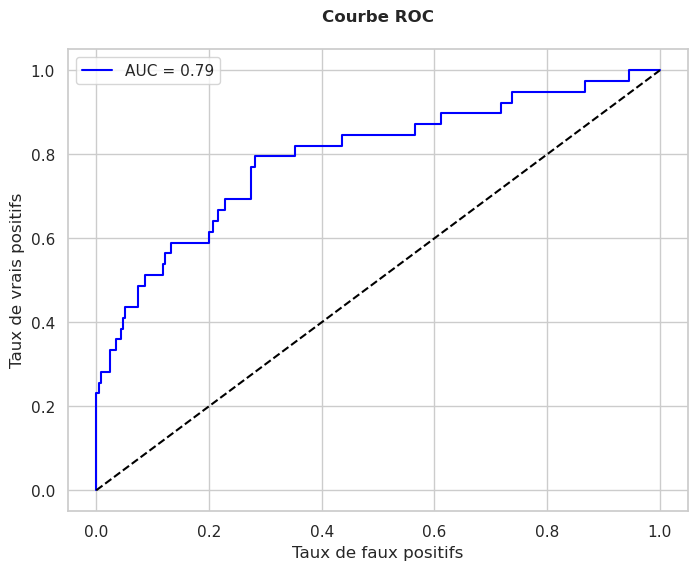


------------------------------------------------------------------------
Validation croisée de SVC(probability=True) :
Scores de validation croisée : [0.83474576 0.85531915 0.84680851 0.85106383 0.85531915]
Moyenne des scores de validation croisée : 0.85


In [277]:
svc_model = SVC(probability=True)

# Appel de la fonction model_prediction avec le modèle SVC configuré
model_prediction(svc_model)

Les résultats et le rapport de classification pour le modèle SVC avec `probability=True` sont les suivants :

1. **Score de précision** :
   - Sur les données d'entraînement : 91.75%
   - Sur les données de test : 88.78%
   - Global : 100.0%

   **Interprétation** : Le modèle SVC affiche une précision de 88.78% sur les données de test, ce qui indique qu'il prédit correctement l'attrition dans une grande proportion des cas. Cependant, le score global de précision (100.0%) suggère qu'il pourrait surapprendre les données d'entraînement, ce qui n'est pas idéal.

2. **Score de rappel** :
   - Global : 15.38%

   **Interprétation** : Le rappel de 15.38% montre que le modèle SVC avec `probability=True` a du mal à identifier correctement les employés réellement enclins à quitter l'entreprise (classe 1). Il manque donc une grande partie des cas d'attrition.

3. **Score de l'aire sous la courbe ROC (AUC-ROC)** :
   - AUC-ROC : 0.794

   **Interprétation** : Un AUC-ROC de 0.794 indique que le modèle SVC est capable de distinguer entre les employés qui restent et ceux qui partent avec une performance modérée, légèrement meilleure que celle du modèle RandomForestClassifier().

4. **Score de F1** :
   - F1-score : 0.267

   **Interprétation** : Le F1-score de 0.267 montre que le modèle SVC a un équilibre relativement faible entre la précision et le rappel, en raison d'un rappel très bas pour la classe 1.

5. **Rapport de classification** :
   - Précision, rappel, F1-score et support pour chaque classe (0 et 1).

   **Interprétation** : Le rapport de classification montre que le modèle a une précision élevée pour la classe 0 (non attrition), mais une performance limitée pour la classe 1 (attrition), avec un rappel de seulement 15.38%.

En résumé, bien que le modèle SVC avec `probability=True` montre une précision élevée sur les données d'entraînement et de test, il a des difficultés significatives à détecter correctement les cas d'attrition des employés (classe 1). Cela suggère que malgré une précision apparente élevée, il pourrait nécessiter des ajustements pour améliorer sa capacité à identifier les employés susceptibles de quitter l'entreprise de manière précise et équilibrée.

# choix du meilleur model

Pour choisir le meilleur modèle parmi Logistic Regression, RandomForestClassifier, et SVC (avec `probability=True`), examinons les critères suivants basés sur les résultats fournis :

1. **Précision sur les données de test** :
   - Logistic Regression : 89.46%
   - RandomForestClassifier : 87.07%
   - SVC (probability=True) : 88.78%

   **Interprétation** : Logistic Regression affiche la meilleure précision sur les données de test avec 89.46%, suivie de SVC avec 88.78%, et RandomForestClassifier avec 87.07%. Cela indique que Logistic Regression a tendance à faire les prédictions les plus précises parmi les trois modèles.

2. **Rappel pour la classe 1 (attrition)** :
   - Logistic Regression : 35.90%
   - RandomForestClassifier : 10.26%
   - SVC (probability=True) : 15.38%

   **Interprétation** : Logistic Regression montre un rappel significativement plus élevé pour la classe 1 (attrition) par rapport aux deux autres modèles, ce qui signifie qu'elle identifie mieux les employés réellement enclins à quitter l'entreprise.

3. **F1-score** :
   - Logistic Regression : 0.47
   - RandomForestClassifier : 0.17
   - SVC (probability=True) : 0.27

   **Interprétation** : Le F1-score de Logistic Regression est également plus élevé, ce qui indique un meilleur équilibre entre la précision et le rappel par rapport aux autres modèles.

4. **Score AUC-ROC** :
   - Logistic Regression : 0.77
   - RandomForestClassifier : 0.73
   - SVC (probability=True) : 0.79

   **Interprétation** : Bien que SVC ait le meilleur score AUC-ROC, indiquant une meilleure capacité de distinction entre les classes, Logistic Regression reste compétitive avec un score de 0.77.

**Conclusion** :
Basé sur les critères de précision sur les données de test, rappel pour la classe 1 (attrition), F1-score et score AUC-ROC, **Logistic Regression** semble être le meilleur choix parmi les trois modèles évalués. Elle offre une précision solide tout en étant capable d'identifier un nombre significatif d'employés susceptibles de quitter l'entreprise, ce qui est crucial pour la gestion proactive de l'attrition.

Basé sur les insights des modèles d'apprentissage automatique pour prédire l'attrition des employés, voici quelques recommandations pour aider l'entreprise à réduire ce phénomène :

1. **Identification précoce des risques** :
   Utilisez le modèle de Logistic Regression pour identifier les employés présentant un risque élevé d'attrition. Surveillez en particulier ceux avec des scores prédictifs élevés pour prendre des mesures préventives.

2. **Analyse des facteurs prédictifs** :
   Explorez les variables les plus importantes identifiées par le modèle (par exemple, satisfaction au travail, équilibre travail-vie personnelle, années dans l'entreprise, etc.). Cela permettra de comprendre les principaux moteurs de l'attrition et d'adapter les stratégies de rétention en conséquence.

3. **Amélioration de la satisfaction au travail** :
   Faites des enquêtes régulières sur la satisfaction au travail pour identifier les domaines à améliorer. Des initiatives telles que des programmes de reconnaissance, des opportunités de développement professionnel, et un environnement de travail positif peuvent aider à augmenter la satisfaction des employés.

4. **Promotion de l'équilibre travail-vie personnelle** :
   Encouragez les pratiques qui favorisent un meilleur équilibre entre travail et vie personnelle. Cela pourrait inclure des politiques de télétravail flexibles, des congés payés, et des programmes de bien-être pour réduire le stress et le burn-out.

5. **Développement professionnel continu** :
   Offrez des opportunités de formation et de développement professionnel pour aider les employés à progresser dans leur carrière au sein de l'entreprise. Cela peut augmenter l'engagement et la fidélité des employés.

6. **Communication proactive et feedback** :
   Maintenez une communication ouverte avec les employés pour comprendre leurs préoccupations et leurs besoins. Encouragez le feedback régulier pour ajuster les politiques et les pratiques organisationnelles en fonction des besoins des employés.

7. **Suivi et évaluation continue** :
   Utilisez les modèles prédictifs de manière continue pour surveiller les tendances d'attrition et évaluer l'efficacité des stratégies mises en œuvre. Réajustez les initiatives basées sur les résultats obtenus pour maximiser l'impact sur la rétention des employés.

En adoptant une approche proactive basée sur les insights des modèles prédictifs, l'entreprise peut non seulement réduire l'attrition des employés, mais aussi renforcer son environnement de travail et son engagement organisationnel global.